# AIVLE스쿨 2차 미니프로젝트: 신규 아파트 주차 수요 예측

<img src = "https://github.com/Jangrae/img/blob/master/parking.png?raw=true" width=800, align="left"/>

# 단계 2: 탐색적 데이터 분석

## [미션]

단계1 에서 생성한 데이터에 대해서 탐색적 분석을 수행합니다.

1) 단변량 분석
    - 숫자형, 범주형 변수에 맞게 데이터를 탐색하며 비즈니스적 의미를 파악합니다.
2) 이변량 분석
    - 숫자형 변수 → 실차량수 상관관계를 분석합니다.    
    - 범주형 변수 → 실차량수 관계를 분석합니다.
3) 전처리(추가)
    - 범주형 변수 중에는 범줏값 개수가 적은 범주들은 유사한 범주끼리 묶어 봅니다.
    - 불필요한 변수를 제거합니다.

## 1. 환경설정

### (1) 로컬 수행(Anaconda)

- project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [819]:
# 기본 경로
path = ''

### (2) 구글 콜랩 수행

- 구글 콜랩을 사용중이면 구글 드라이브를 연결합니다.

In [821]:
# 구글 드라이브 연결, 패스 지정
import sys
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')
    path = '/content/drive/MyDrive/project/'

### (3) 한글 폰트 표시용 라이브러리 설치

In [823]:
# 한글 표시를 위한 라이브러리 설치
!pip install koreanize_matplotlib -q

### (4) 라이브러리 불러오기

In [825]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

import joblib
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

### (5) 데이터 불러오기

- joblib.dump() 함수를 사용해 이전에 저장했던 base_data1.pkl 파일을 읽어옵니다.
- 읽어온 데이터를 apart 데이터프레임으로 선언합니다.

#### 1) 데이터 불러오기

In [828]:
# 파일 불러오기
apart = joblib.load(path+'base_data1.pkl')

#### 2) 기본 정보 조회

In [830]:
apart.shape

(345, 18)

In [831]:
apart.head()

,단지코드,총세대수,지역,준공연도,건물형태,난방방식,승강기설치여부,실차량수,총면적,면적10_30,면적30_40,면적40_50,면적50_60,면적60_70,면적70_80,면적80_200,임대보증금,임대료
0,C0001,78,서울,2013,계단식,개별가스난방,전체동 설치,109,6023.7683,0,0,0,78,0,0,0,5.696200e+07,642930.000000
1,C0002,35,서울,2013,복도식,개별가스난방,전체동 설치,35,1569.1668,35,0,0,0,0,0,0,6.306200e+07,470100.000000
2,C0003,88,서울,2013,계단식,개별가스난방,전체동 설치,88,7180.1396,0,0,0,88,0,0,0,7.219000e+07,586540.000000
3,C0004,477,서울,2014,복도식,지역난방,전체동 설치,943,47058.9273,0,0,0,150,0,216,111,1.015167e+08,950305.000000
4,C0006,15,서울,2013,복도식,개별가스난방,전체동 설치,21,543.0268,15,0,0,0,0,0,0,5.522750e+07,340148.333333


In [832]:
apart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   단지코드      345 non-null    object 
 1   총세대수      345 non-null    int64  
 2   지역        345 non-null    object 
 3   준공연도      345 non-null    int64  
 4   건물형태      345 non-null    object 
 5   난방방식      345 non-null    object 
 6   승강기설치여부   345 non-null    object 
 7   실차량수      345 non-null    int64  
 8   총면적       345 non-null    float64
 9   면적10_30   345 non-null    int64  
 10  면적30_40   345 non-null    int64  
 11  면적40_50   345 non-null    int64  
 12  면적50_60   345 non-null    int64  
 13  면적60_70   345 non-null    int64  
 14  면적70_80   345 non-null    int64  
 15  면적80_200  345 non-null    int64  
 16  임대보증금     345 non-null    float64
 17  임대료       345 non-null    float64
dtypes: float64(3), int64(10), object(5)
memory usage: 48.6+ KB


## 2. 기본 분석

- 기술통계정보, 결측치 확인 등 기본 분석을 수행합니다.

In [834]:
apart.describe()

,총세대수,준공연도,실차량수,총면적,면적10_30,면적30_40,면적40_50,면적50_60,면적60_70,면적70_80,면적80_200,임대보증금,임대료
count,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,3.450000e+02,345.000000
mean,546.759420,2007.713043,555.431884,37282.661962,45.837681,169.513043,147.455072,132.889855,1.852174,16.895652,34.515942,2.382737e+07,197729.050210
std,432.359538,7.261036,374.640474,29588.197927,161.133746,222.935074,216.675593,252.947082,32.771294,76.441995,116.975949,2.247481e+07,158760.777669
min,1.000000,1992.000000,21.000000,68.930000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,178.000000,2003.000000,258.000000,11293.832100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.272491e+07,112905.000000
50%,491.000000,2008.000000,498.000000,32190.360000,0.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.930850e+07,172000.000000
75%,853.000000,2013.000000,822.000000,56189.979600,0.000000,298.000000,264.000000,150.000000,0.000000,0.000000,0.000000,2.837700e+07,227564.000000
max,2289.000000,2022.000000,1657.000000,150126.863200,1181.000000,1429.000000,1258.000000,1444.000000,608.000000,756.000000,850.000000,1.898219e+08,950305.000000


In [835]:
apart.isna().sum()

단지코드        0
총세대수        0
지역          0
준공연도        0
건물형태        0
난방방식        0
승강기설치여부     0
실차량수        0
총면적         0
면적10_30     0
면적30_40     0
면적40_50     0
면적50_60     0
면적60_70     0
면적70_80     0
면적80_200    0
임대보증금       0
임대료         0
dtype: int64

In [836]:
zero_counts = (apart == 0).sum()
zero_counts

단지코드          0
총세대수          0
지역            0
준공연도          0
건물형태          0
난방방식          0
승강기설치여부       0
실차량수          0
총면적           0
면적10_30     281
면적30_40     151
면적40_50     179
면적50_60     203
면적60_70     343
면적70_80     311
면적80_200    287
임대보증금        36
임대료          36
dtype: int64

## 3. 단변량 분석

- 주요 변수들을 연속형, 범주형으로 구분하여 데이터 분포를 살펴보며 비즈니스적인 의미를 파악합니다.
    - 연속형: '실차량수', '총세대수', '총면적', '준공연도', '임대료', '임대보증금'
    - 범주형: '지역', '건물형태', '난방방식', '승강기설치여부'
- 전용면적구간은 pd.melt() 함수를 사용해 pivot을 해제한 후 분석합니다.

### (1) 연속형 변수

- 대상: '실차량수', '총세대수', '총면적', '준공연도', '임대료', '임대보증금'
- 기술통계, Histogram, Boxplot 등을 사용해 데이터 분포를 파악합니다.
- 반복되는 코드는 함수를 만들어 사용하면 편리합니다.

In [839]:
# 함수 만들기
def Continuous_plot(str):
    print(apart[str].describe())
    plt.figure(figsize=(12, 5))
    plt.subplot(1,2,1)
    sns.histplot(apart[str], bins=15, kde=True)
    plt.subplot(1,2,2)
    sns.boxplot(apart[str])
    plt.show()

#### 1) 실차량수

count     345.000000
mean      555.431884
std       374.640474
min        21.000000
25%       258.000000
50%       498.000000
75%       822.000000
max      1657.000000
Name: 실차량수, dtype: float64


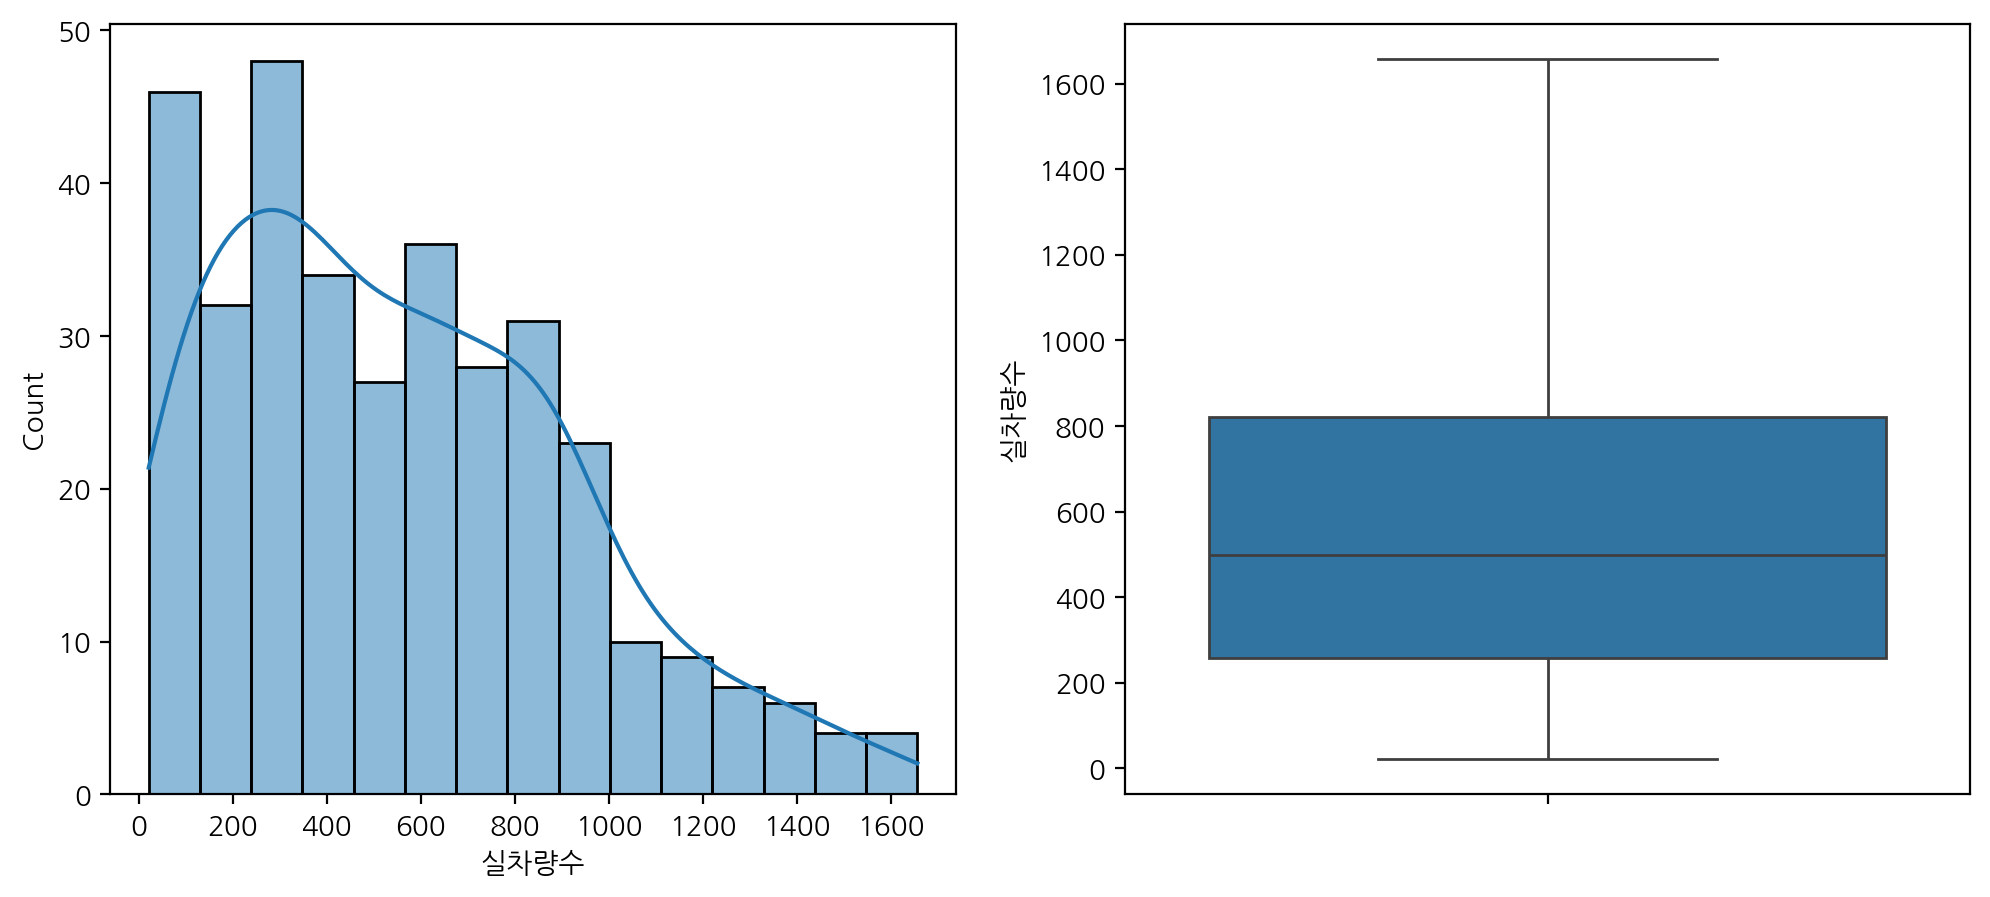

In [841]:
Continuous_plot('실차량수')
# 의견 : 400대가 제일 많고 258 ~ 822가 대부분이다.

#### 2) 총세대수

count     345.000000
mean      546.759420
std       432.359538
min         1.000000
25%       178.000000
50%       491.000000
75%       853.000000
max      2289.000000
Name: 총세대수, dtype: float64


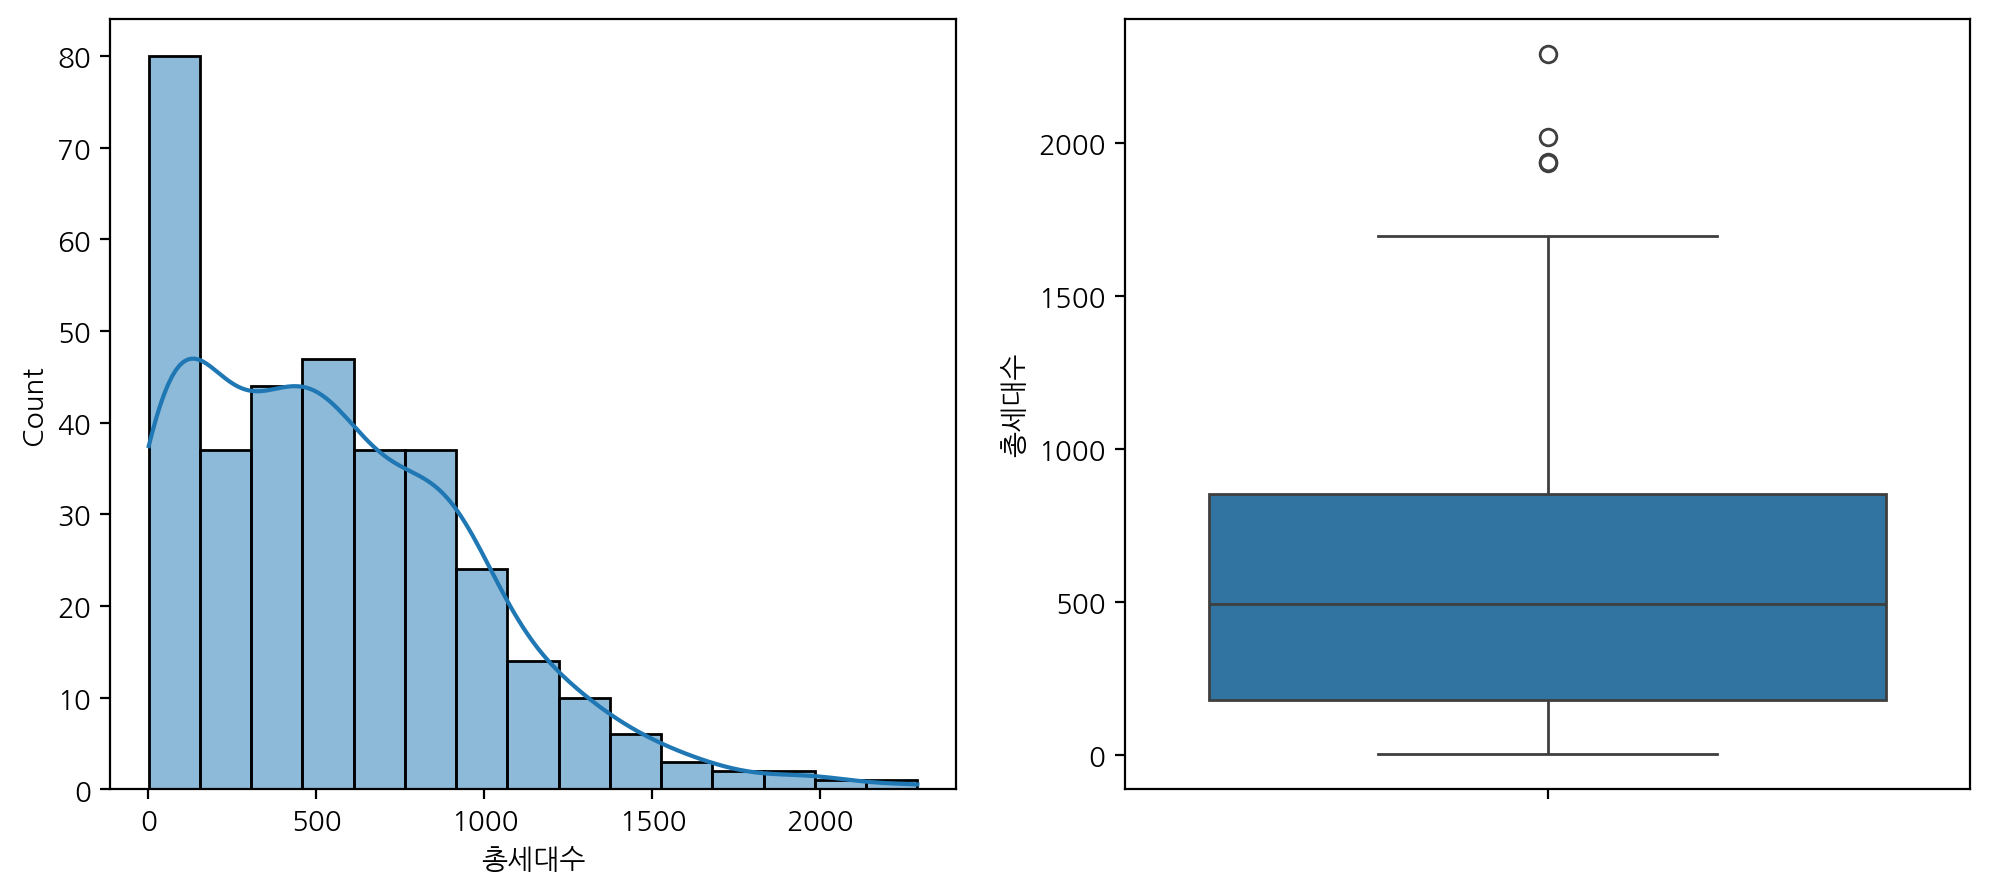

In [843]:
Continuous_plot('총세대수')
# 의견 : 평균 546세대가 산다.

#### 3) 총면적

count       345.000000
mean      37282.661962
std       29588.197927
min          68.930000
25%       11293.832100
50%       32190.360000
75%       56189.979600
max      150126.863200
Name: 총면적, dtype: float64


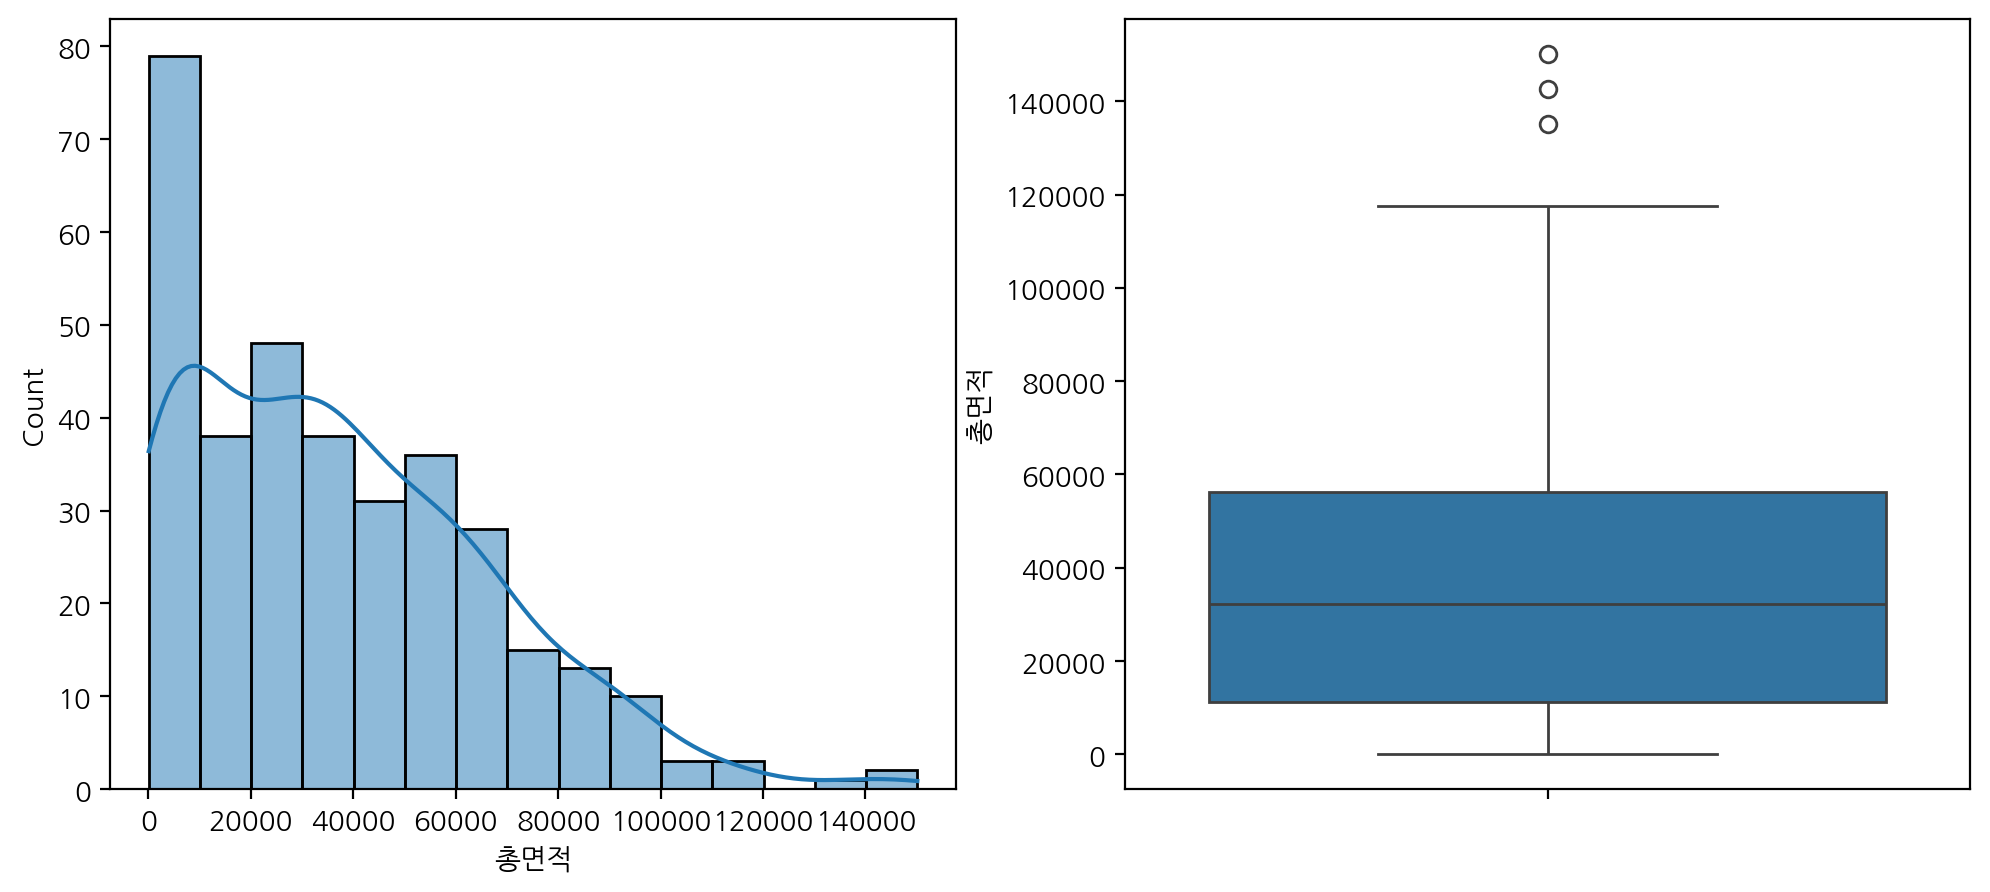

In [845]:
Continuous_plot('총면적')
# 의견 : 10000 ~ 40000 사이의 면적이 많다.

#### 4) 준공연도

count     345.000000
mean     2007.713043
std         7.261036
min      1992.000000
25%      2003.000000
50%      2008.000000
75%      2013.000000
max      2022.000000
Name: 준공연도, dtype: float64


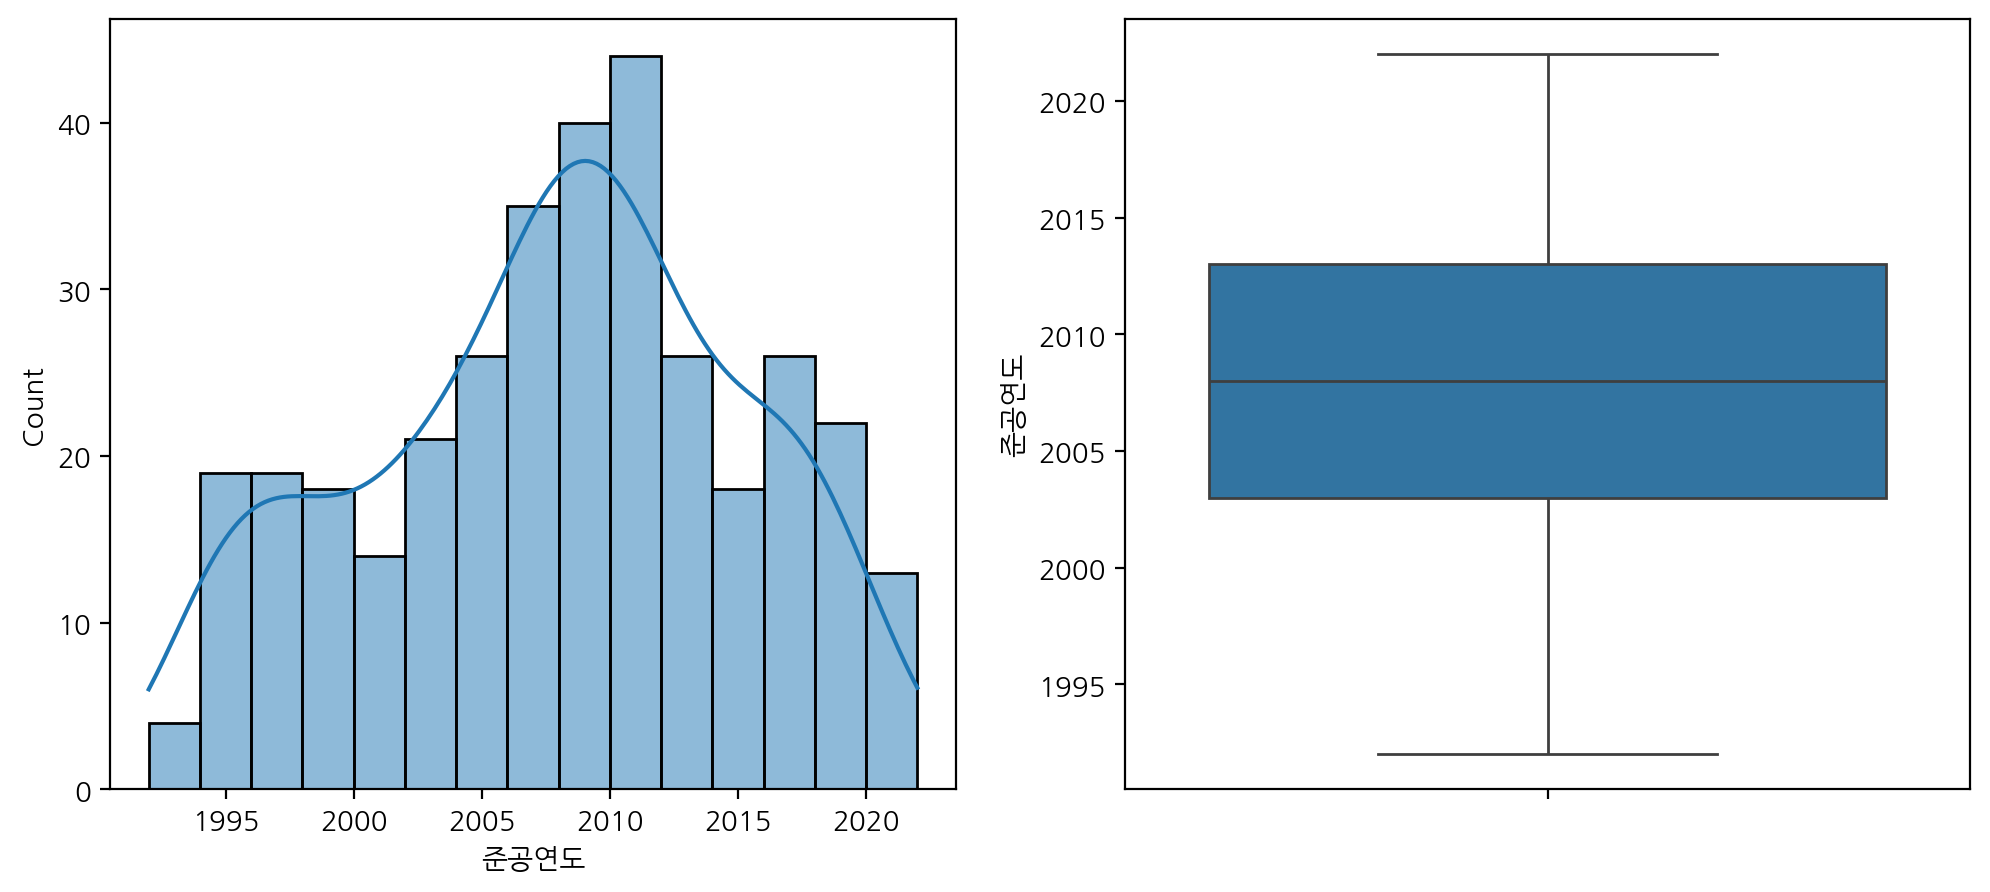

In [847]:
Continuous_plot('준공연도')
# 의견 : 건물을 가장 많이 지은 연도는 약 2007 ~ 2013사이이다.  

#### 5) 임대료

count       345.000000
mean     197729.050210
std      158760.777669
min           0.000000
25%      112905.000000
50%      172000.000000
75%      227564.000000
max      950305.000000
Name: 임대료, dtype: float64


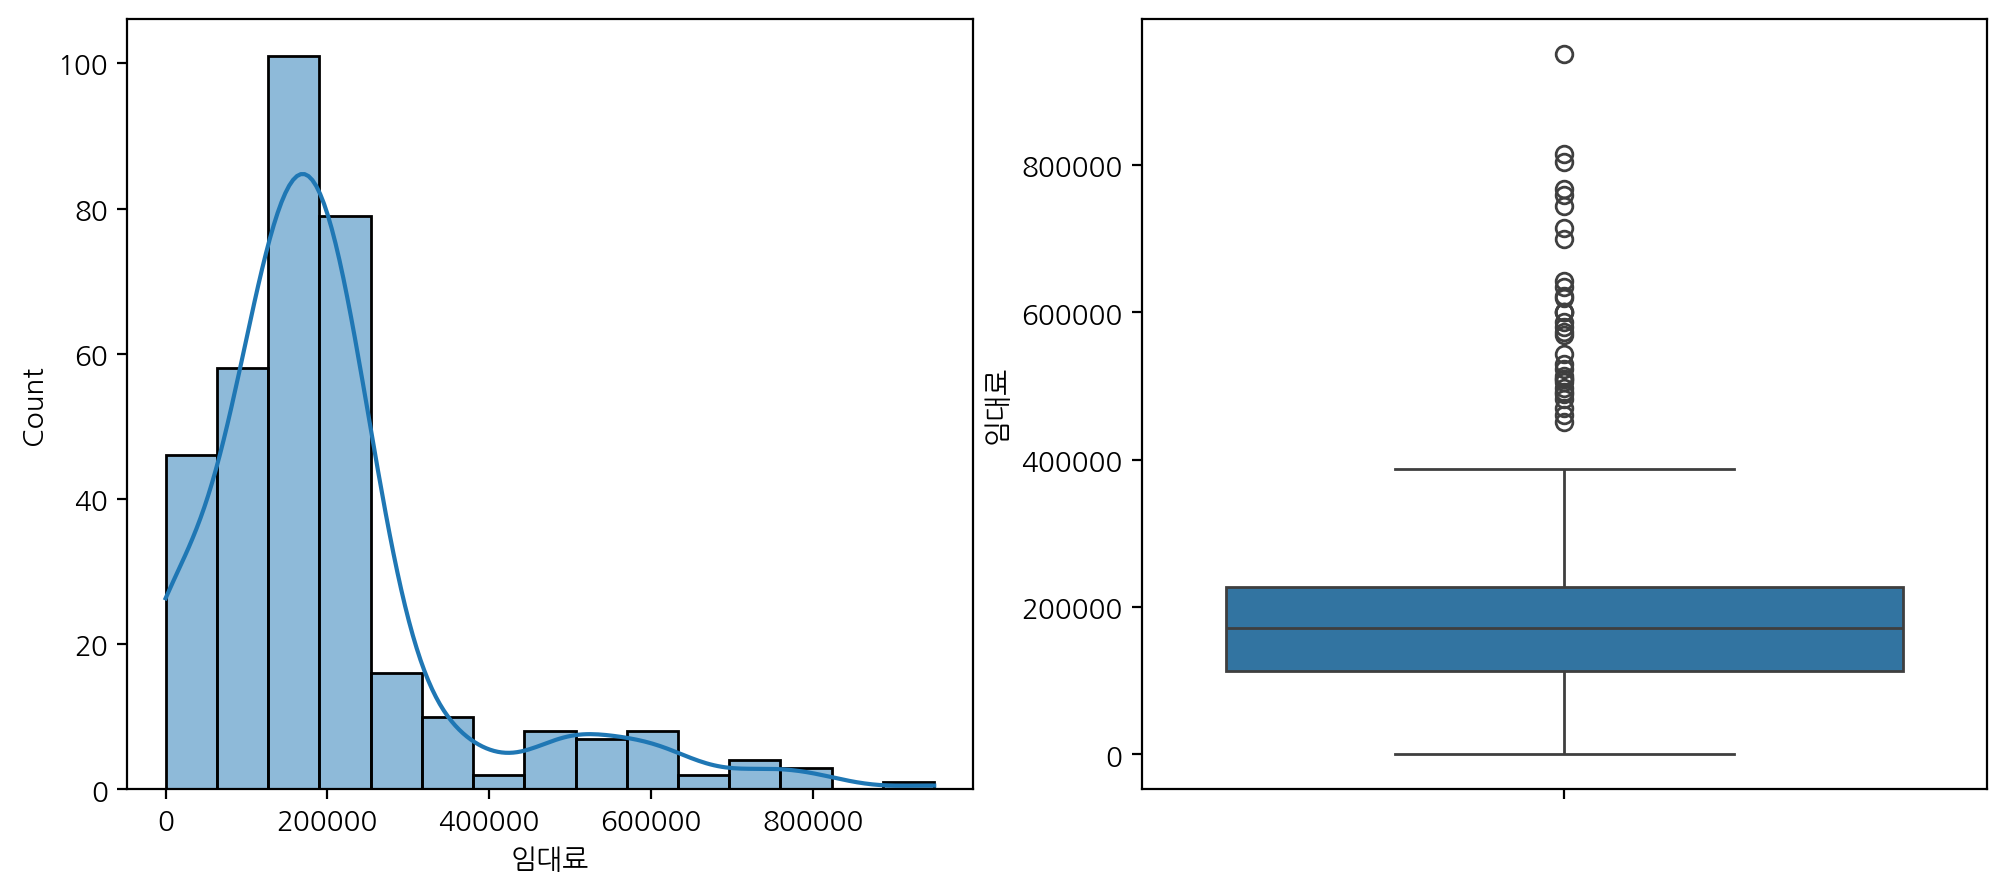

In [849]:
Continuous_plot('임대료')
# 대부분 임대료는 100000~ 200000대이다.이다.

#### 6) 임대보증금

count    3.450000e+02
mean     2.382737e+07
std      2.247481e+07
min      0.000000e+00
25%      1.272491e+07
50%      1.930850e+07
75%      2.837700e+07
max      1.898219e+08
Name: 임대보증금, dtype: float64


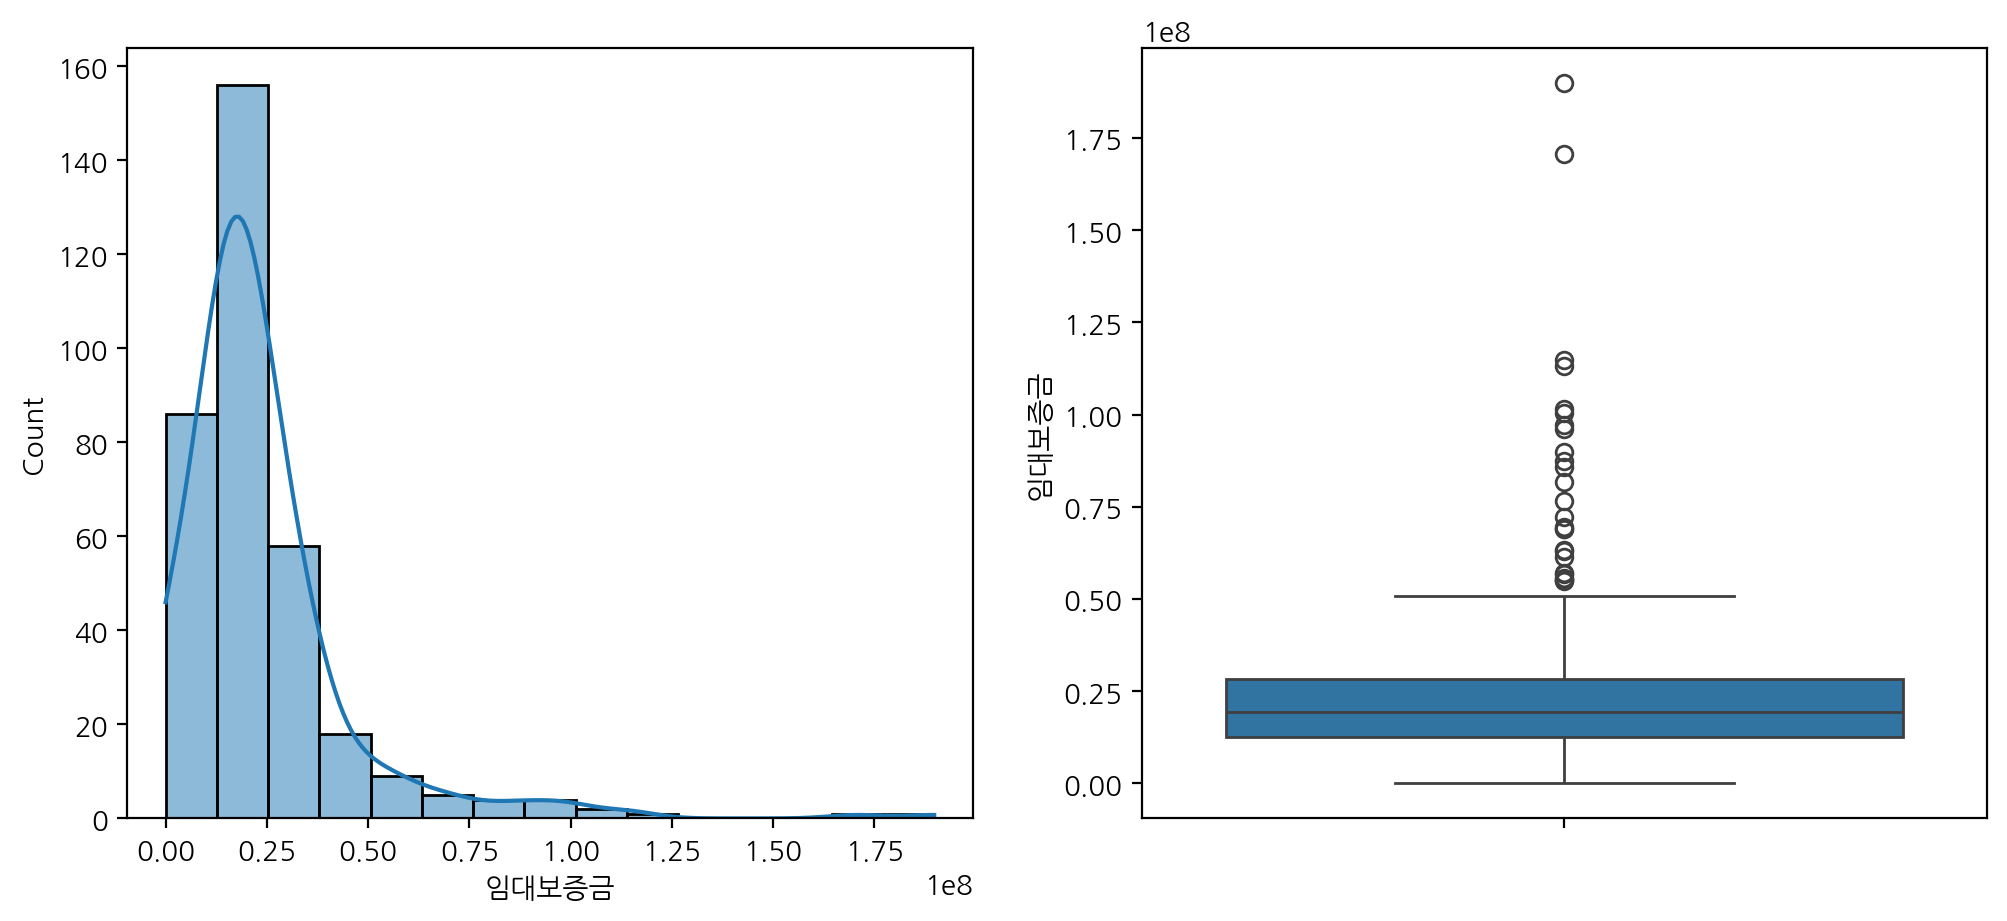

In [851]:
Continuous_plot('임대보증금')
# 의견 : 대부분의 임대보증금은 0~0.50 사이이다.

### (2) 범주형 변수

- 대상: '지역', '건물형태', '난방방식', '승강기설치여부'
- sns.countplot() 함수 등을 사용해 데이터 분포를 확인합니다.
- 반복되는 코드는 함수를 만들어 사용하면 편리합니다.

In [853]:
# 함수 만들기
def Category_plot(str):
    print(apart[str].describe())
    sns.countplot(apart[str])
    plt.show()

#### 1) 지역

count     345
unique     12
top        경기
freq       77
Name: 지역, dtype: object


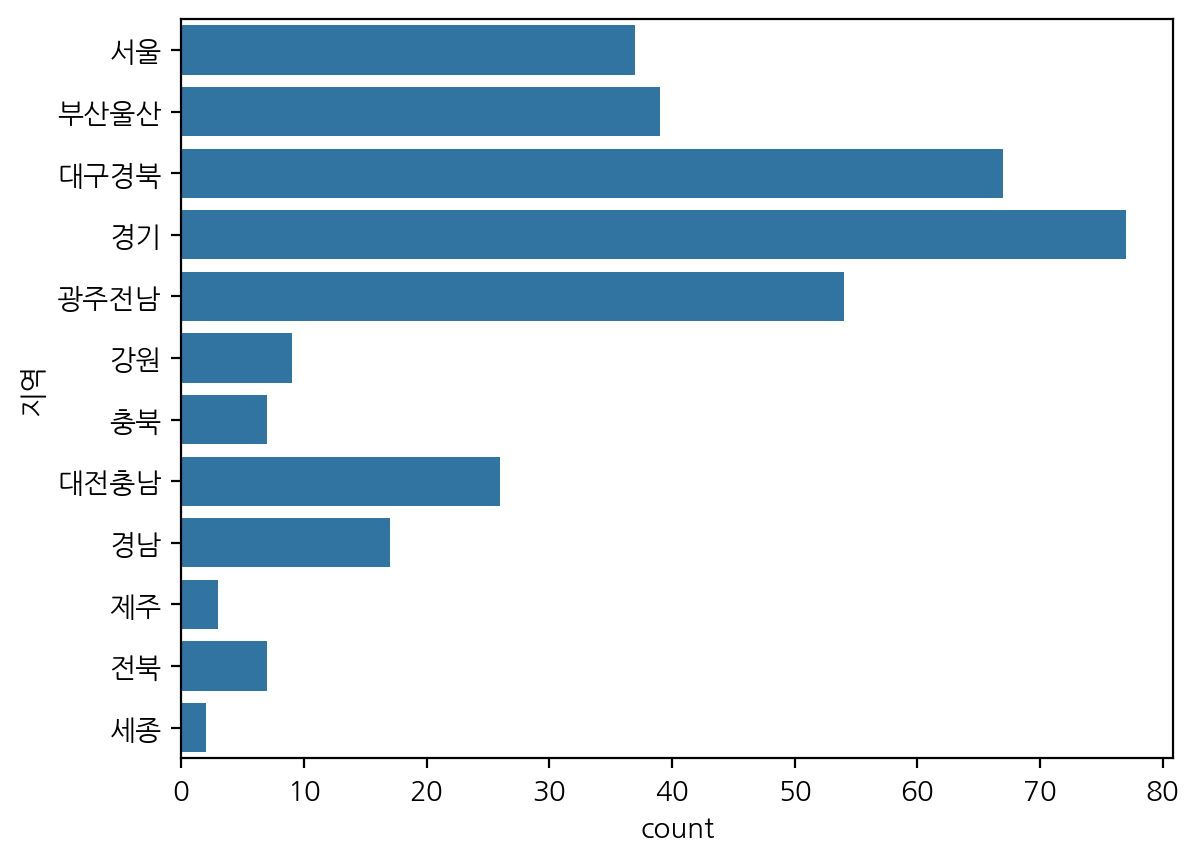

In [855]:
Category_plot('지역')
# 의견 : 경기에 건물이 가장 많고 그 다음으로 대구경북, 광주전남이다.

#### 2) 건물형태

count     345
unique      3
top       복도식
freq      200
Name: 건물형태, dtype: object


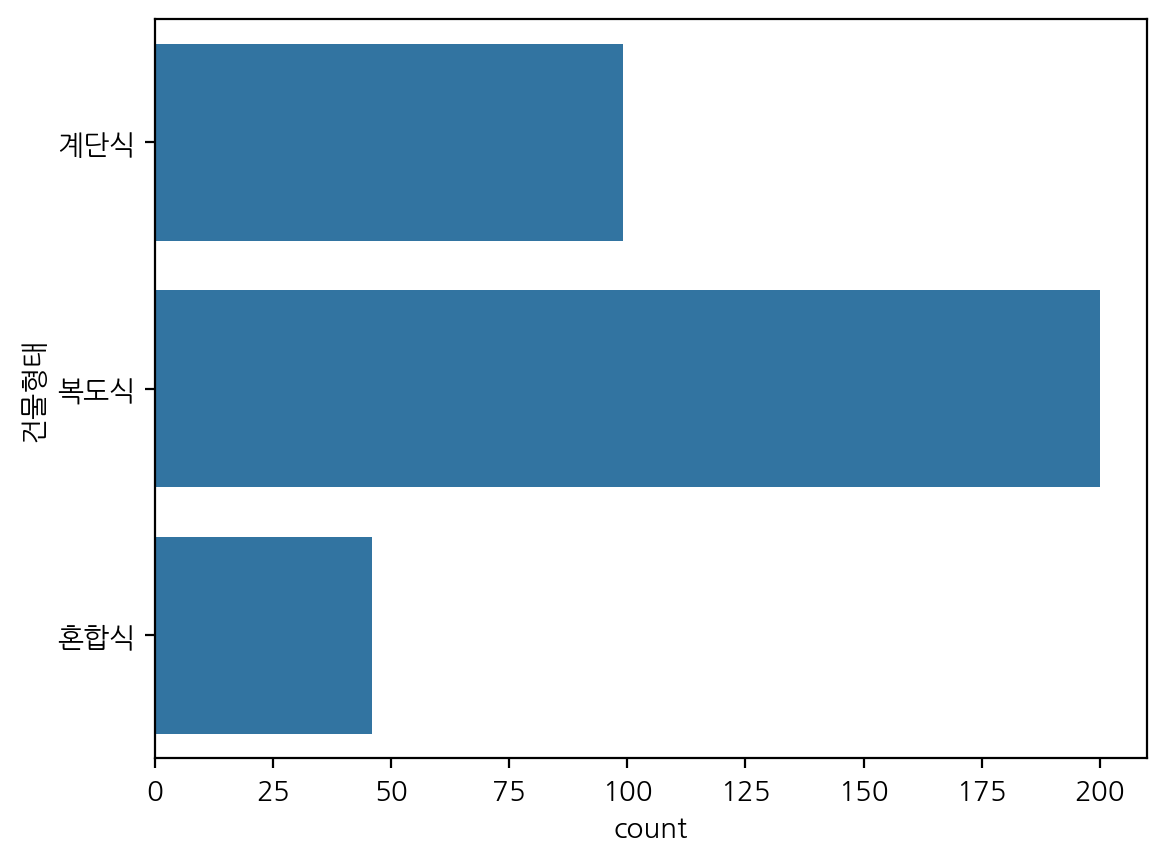

In [857]:
Category_plot('건물형태')
# 의견 : 복도식 건물이 많다.

#### 3) 난방방식

count        345
unique         8
top       개별가스난방
freq         210
Name: 난방방식, dtype: object


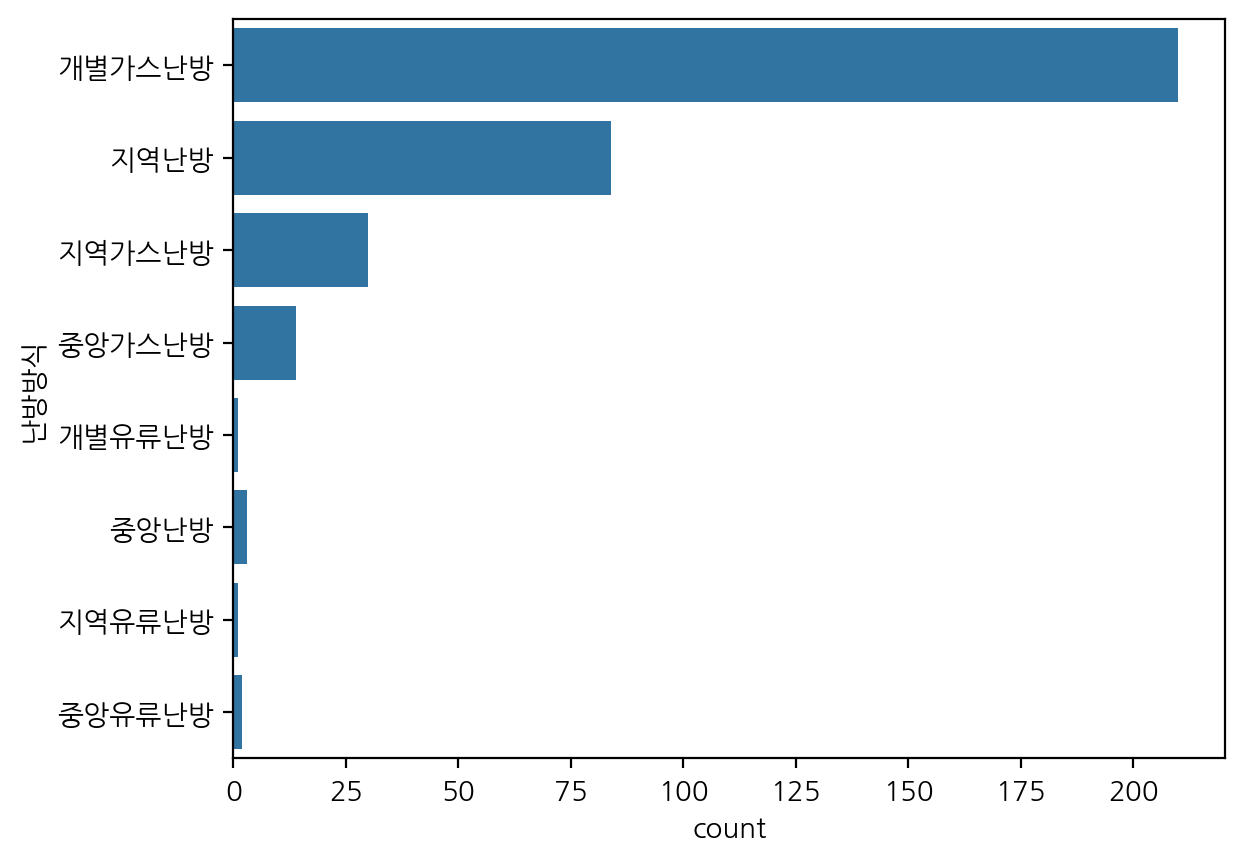

In [859]:
Category_plot('난방방식')
# 의견 : 개별가스난방이 가장 많다. 

#### 4) 승강기설치여부

count        345
unique         3
top       전체동 설치
freq         333
Name: 승강기설치여부, dtype: object


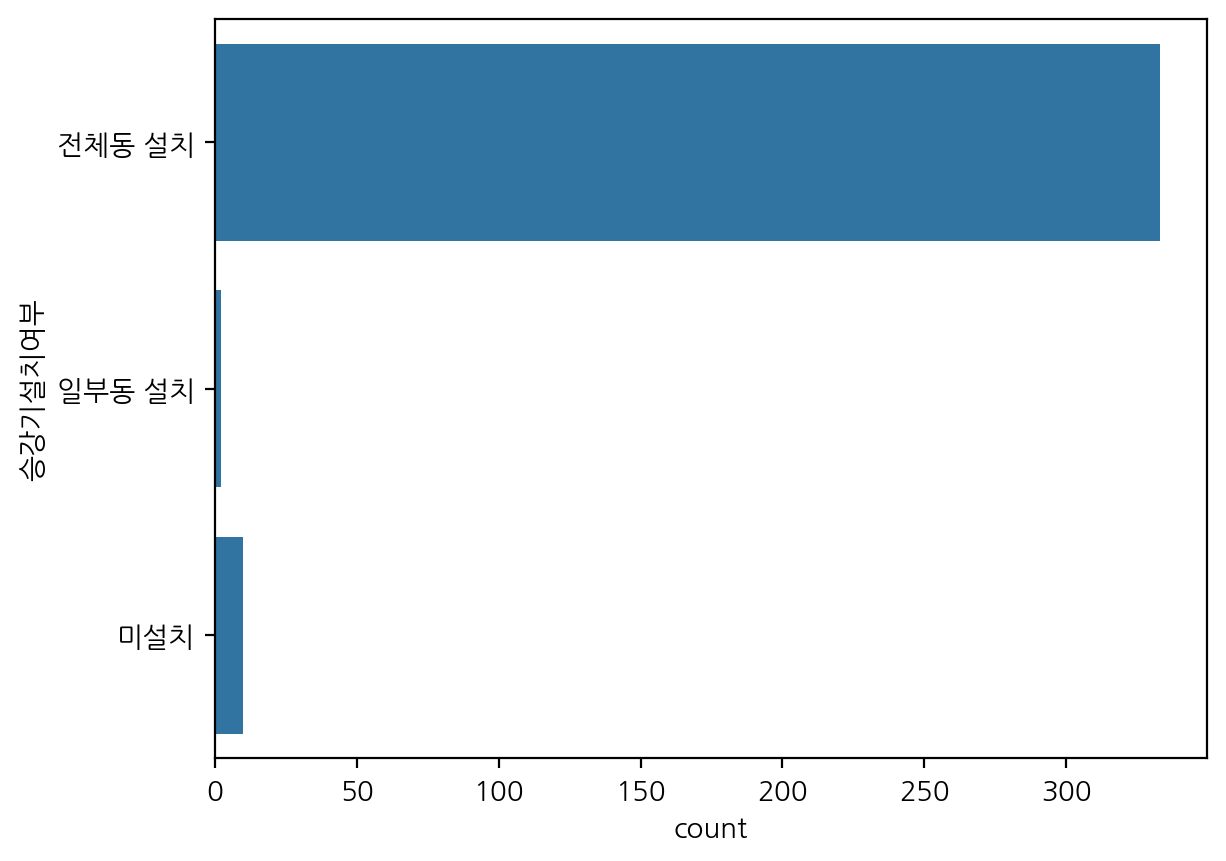

In [861]:
Category_plot('승강기설치여부')
# 의견 : 승강기는 전체동 설치가 많다.

#### 5) 전용면적구간

- 전용면적구간은 pd.melt() 함수를 사용해 pivot을 해제하여 전용면적구간별 세대수를 분석합니다.

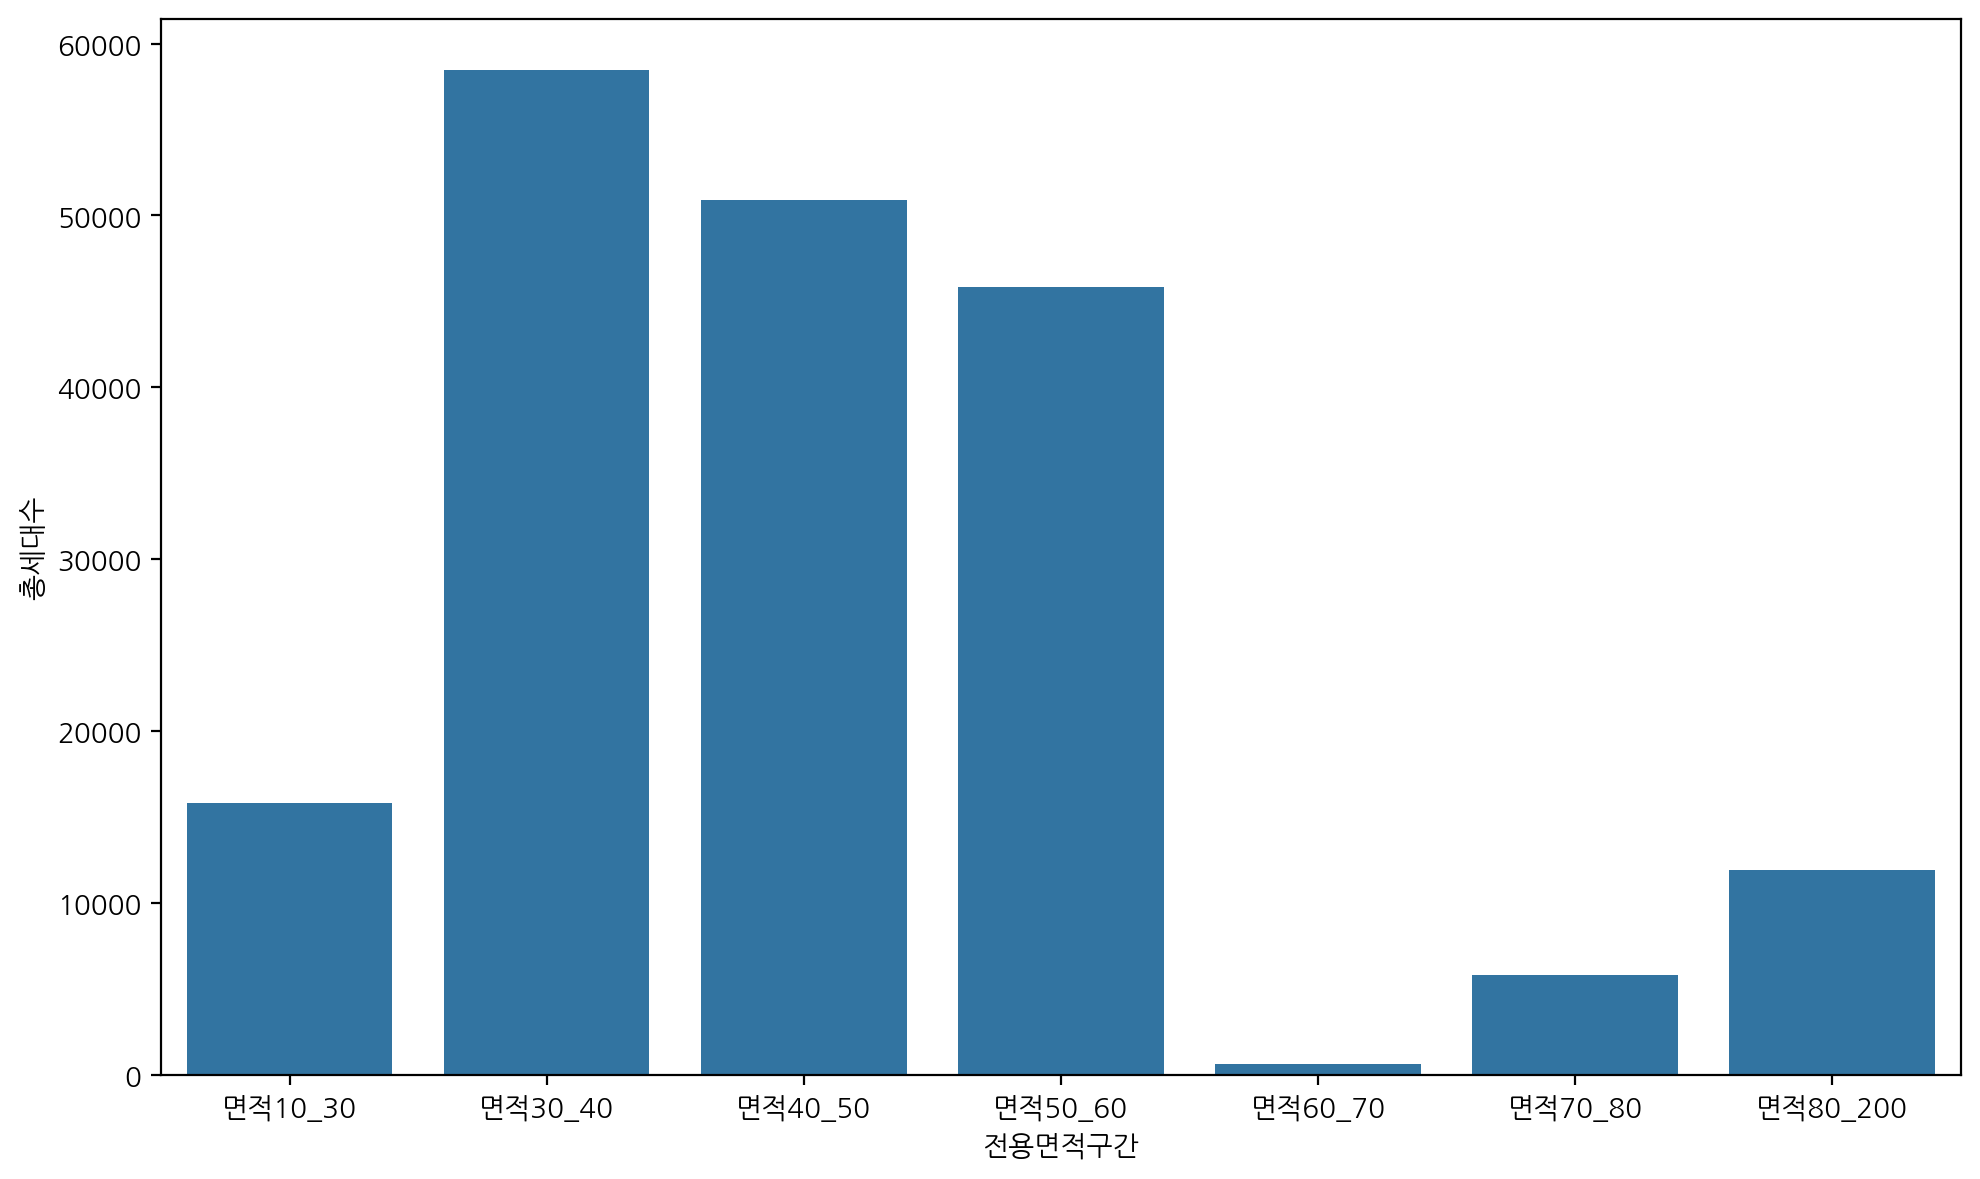

In [863]:
apart2 = apart.loc[:,['단지코드','면적10_30', '면적30_40', '면적40_50', '면적50_60', '면적60_70', '면적70_80', '면적80_200']]
apart3 = apart2.melt(id_vars='단지코드', var_name='전용면적구간', value_name='총세대수')

df = apart3.groupby(['전용면적구간'])['총세대수'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='전용면적구간', y='총세대수', data=df)
plt.tight_layout()
plt.show()

In [864]:
# 의견 : 면적30_40과 면적40_50에 총세대수가 많다.

## 4. 이변량 분석

- 숫자형 변수들 간의 상관관계를 분석합니다.
- 숫자형 변수 → 실차량수 상관관계를 분석합니다.    
- 볌주형 변수 → 실차량수 관계를 분석합니다.

### (1) 숫자형 변수들 간의 상관관계

- 숫자형 변수 → 실차량수 상관관계를 분석합니다.    
- 숫자형 변수들 간의 상관관계를 df.corr() 메서드와 sns.heatmap() 함수 등을 사용해 시각화 합니다.

In [867]:
a = apart.loc[:,['실차량수', '총세대수', '준공연도', '총면적', '임대보증금', '임대료']].corr().style.background_gradient()

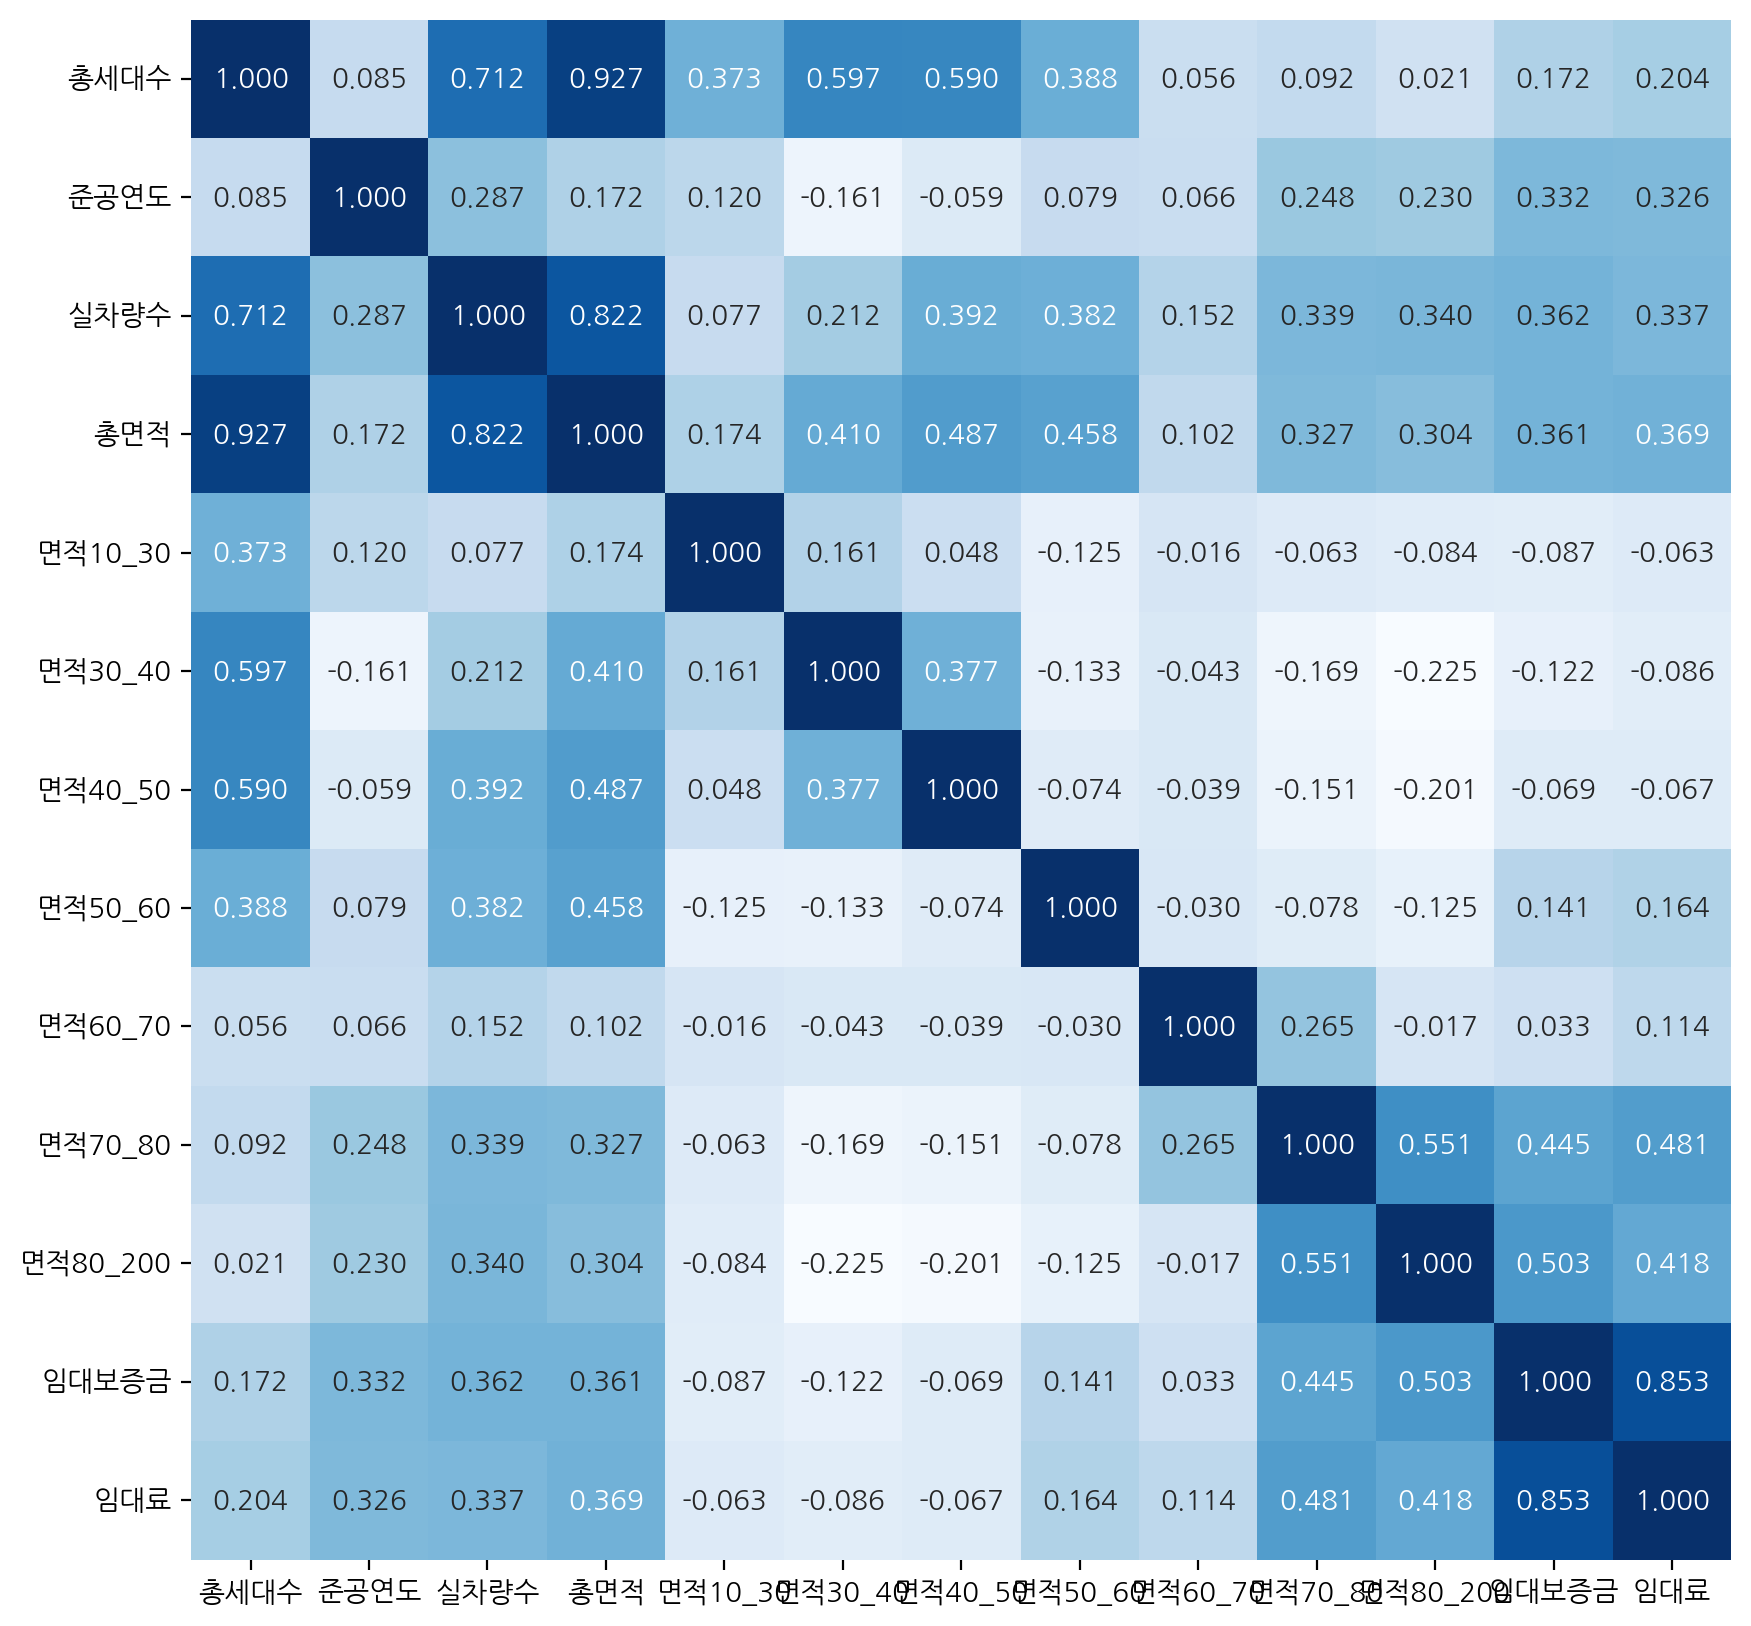

In [869]:
plt.figure(figsize=(10,10))
sns.heatmap(apart.corr(numeric_only=True),
            annot=True, # 숫자 적기
            cmap='Blues', # 색 변환
            cbar=False, # cbar 없애기
            square=True, # 정사각형
            fmt='.3f', # 소숫점 맞추기
            annot_kws={'size' : 10}) # 안쪽 숫자 크기
plt.yticks(rotation=360)
plt.xticks(rotation=360)
plt.show()

### (2) 숫자형 변수 → 실차량수

- 상관계수가 높은 상위 3~5개 숫자형 변수와 실차량수 관계를 산점도를 시각화해 분석합니다.
- 반복되는 코드는 함수를 만들어 사용하면 편리합니다.

In [ ]:
# 함수 만들기
def scatter_plot(var):
    target_var = '실차량수'
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=var, y=target_var, data=apart)
    plt.title(f'{target_var} vs {var}')
    plt.xlabel(var)
    plt.ylabel(target_var)
    plt.show()

#### 1) 총면적

In [ ]:
scatter_plot('총면적')
# 의견 : 면적이 클수록 실차량수가 많은 양의 상관관계가 강하다. 0.822

#### 2) 총세대수

In [ ]:
scatter_plot('총세대수')
# 의견 : 총세대수가 클수록 실차량수가 많다는 양의 상관관계가 강하다. 0.712

#### 3) 면적40_50

In [ ]:
scatter_plot('면적40_50')
# 의견 : 면적중에서 두번째로 많았던 면적40_50에서 실차량수와 약한 상관관계를 가졌다. 0.392

#### 4) 면적50_60

In [ ]:
scatter_plot('면적50_60')
# 의견 : 면적중에서 세번째로 많았던 면적50_60에서 실차량수와 약한 상관관계를 가졌다. 0.382

#### 5) 임대보증금

In [ ]:
scatter_plot('임대보증금')
# 의견 : 임대보증금이 클수록 실차량수가 많다는 약한 상관관계를 가졌다. 0.362

### (3) 범주형 변수 → 실차량수

- 범주형 변수 → 실차량수 관계를 분석합니다.
- 대상: '지역', '준공연도', '건물형태', '난방방식', '승강기설치여부'
- 범줏값 별 실차량수 평균을 막대그래프로 시각화해 분석합니다.
- 반복되는 코드는 함수를 만들어 사용하면 편리합니다.

In [802]:
# 함수 만들기
def bar_plot(var):
    target_var = '실차량수'
    plt.figure(figsize=(15, 6))
    sns.barplot(x=var, y=target_var, data=apart,ci=None)
    plt.title(f'{target_var} vs {var}')
    plt.xlabel(var)
    plt.ylabel(target_var)
    plt.show()

#### 1) 지역

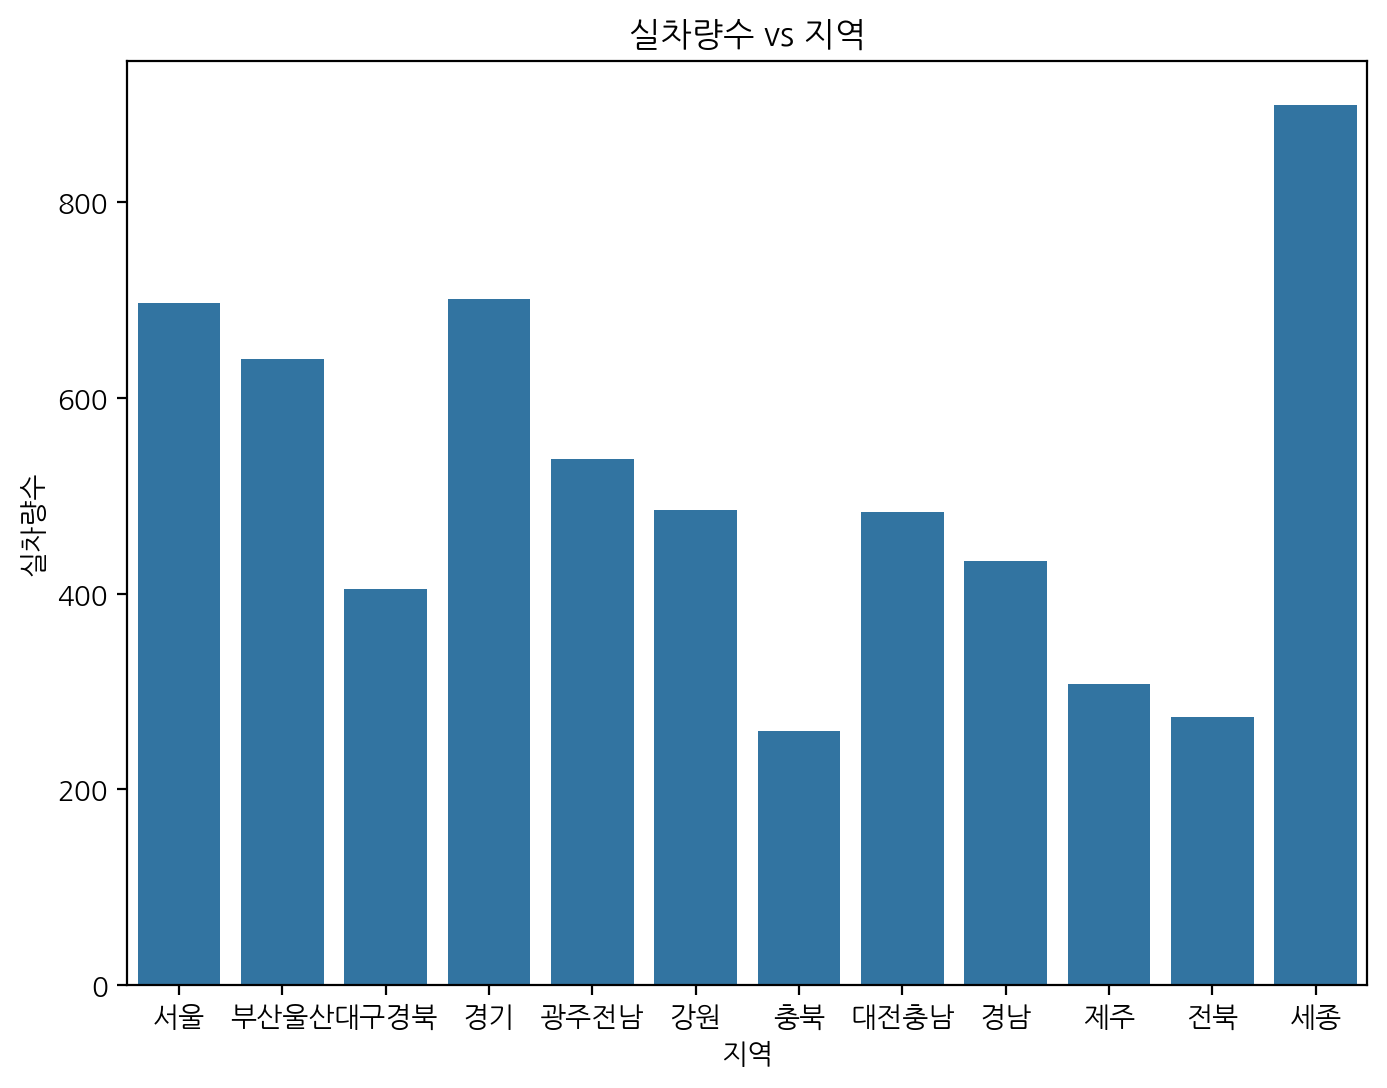

In [756]:
bar_plot('지역')
# 의견 : 세종시에 많은 차량수가 있고 그 다음으로 경기, 서울이다. 세종시에 건물이 제일없는데 실차량수는 제일 많다.

#### 2) 준공연도

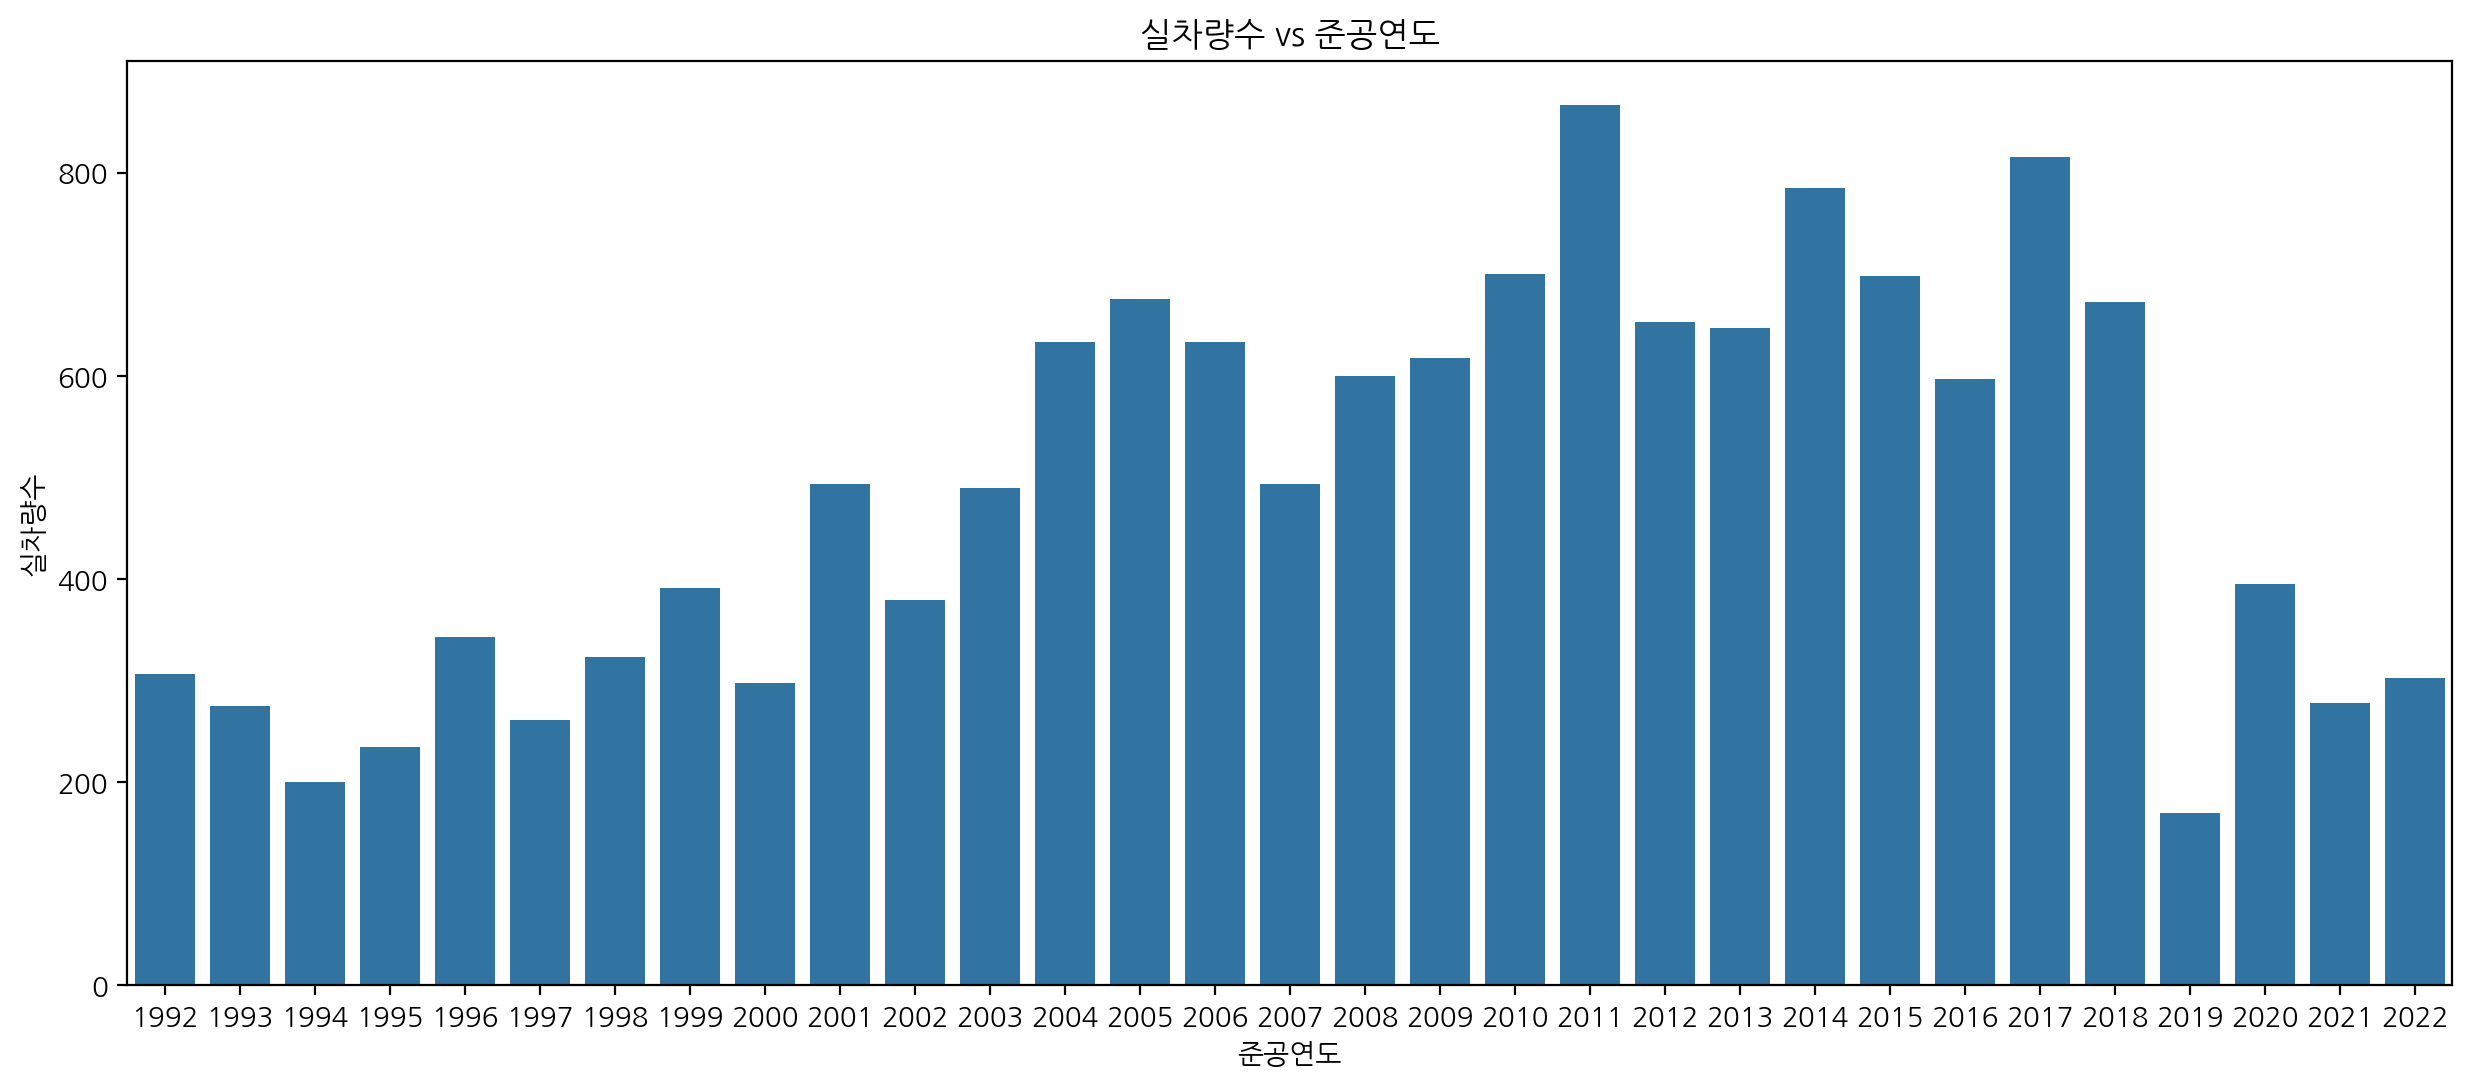

In [804]:
bar_plot('준공연도')
# 의견: 2011년도, 2018년도 사이에 실차량수가 많았지만 2019년도에 급격하게 실차량수가 떨어졌다.

#### 3) 건물형태

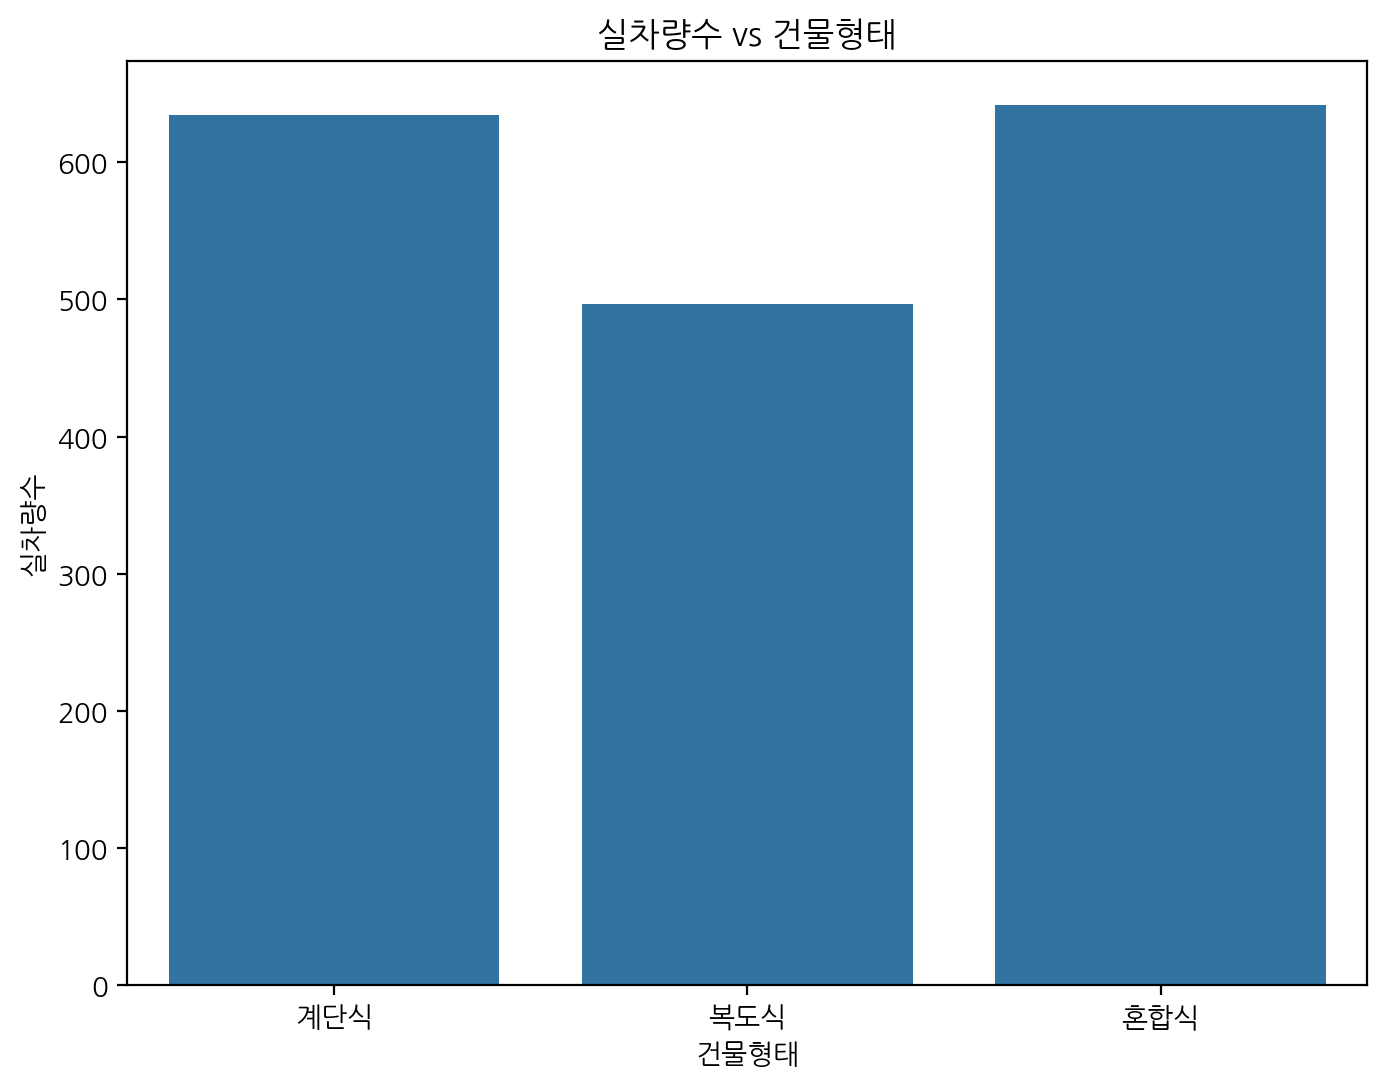

In [760]:
bar_plot('건물형태')
# 의견 :건물형태가 복도식일수록 차량수가 비교적 적다고 볼 수 있을 것 같다.

#### 4) 난방방식

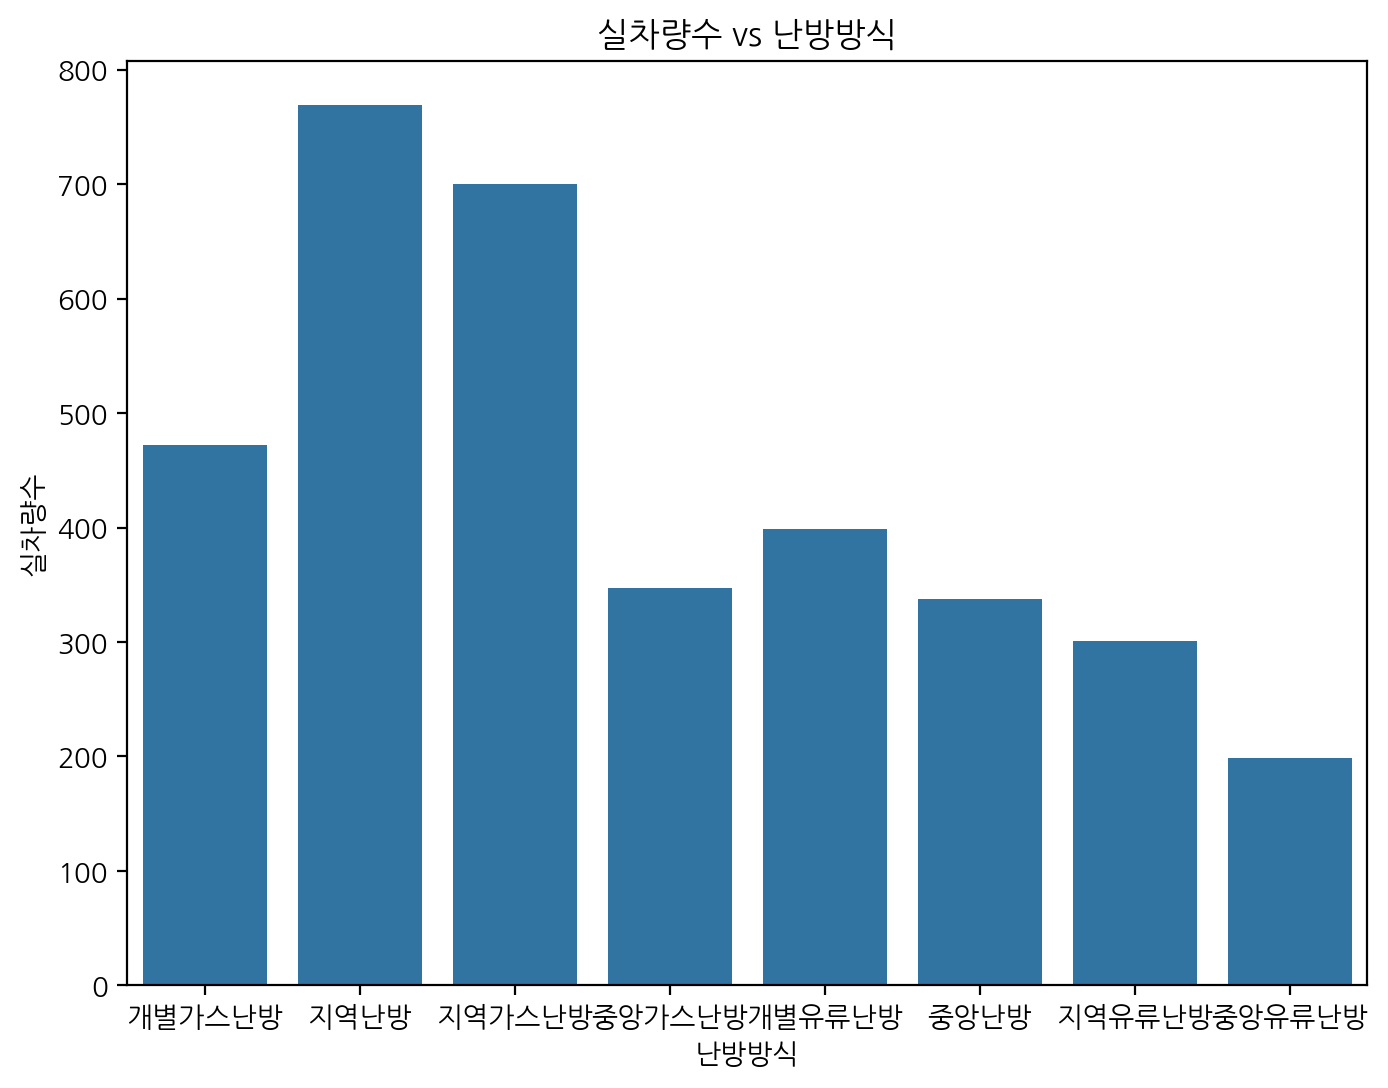

In [762]:
bar_plot('난방방식')
# 의견 : 지역난방이거나 지역가스난방일때 실차량수가 많다.

#### 5) 승강기설치여부

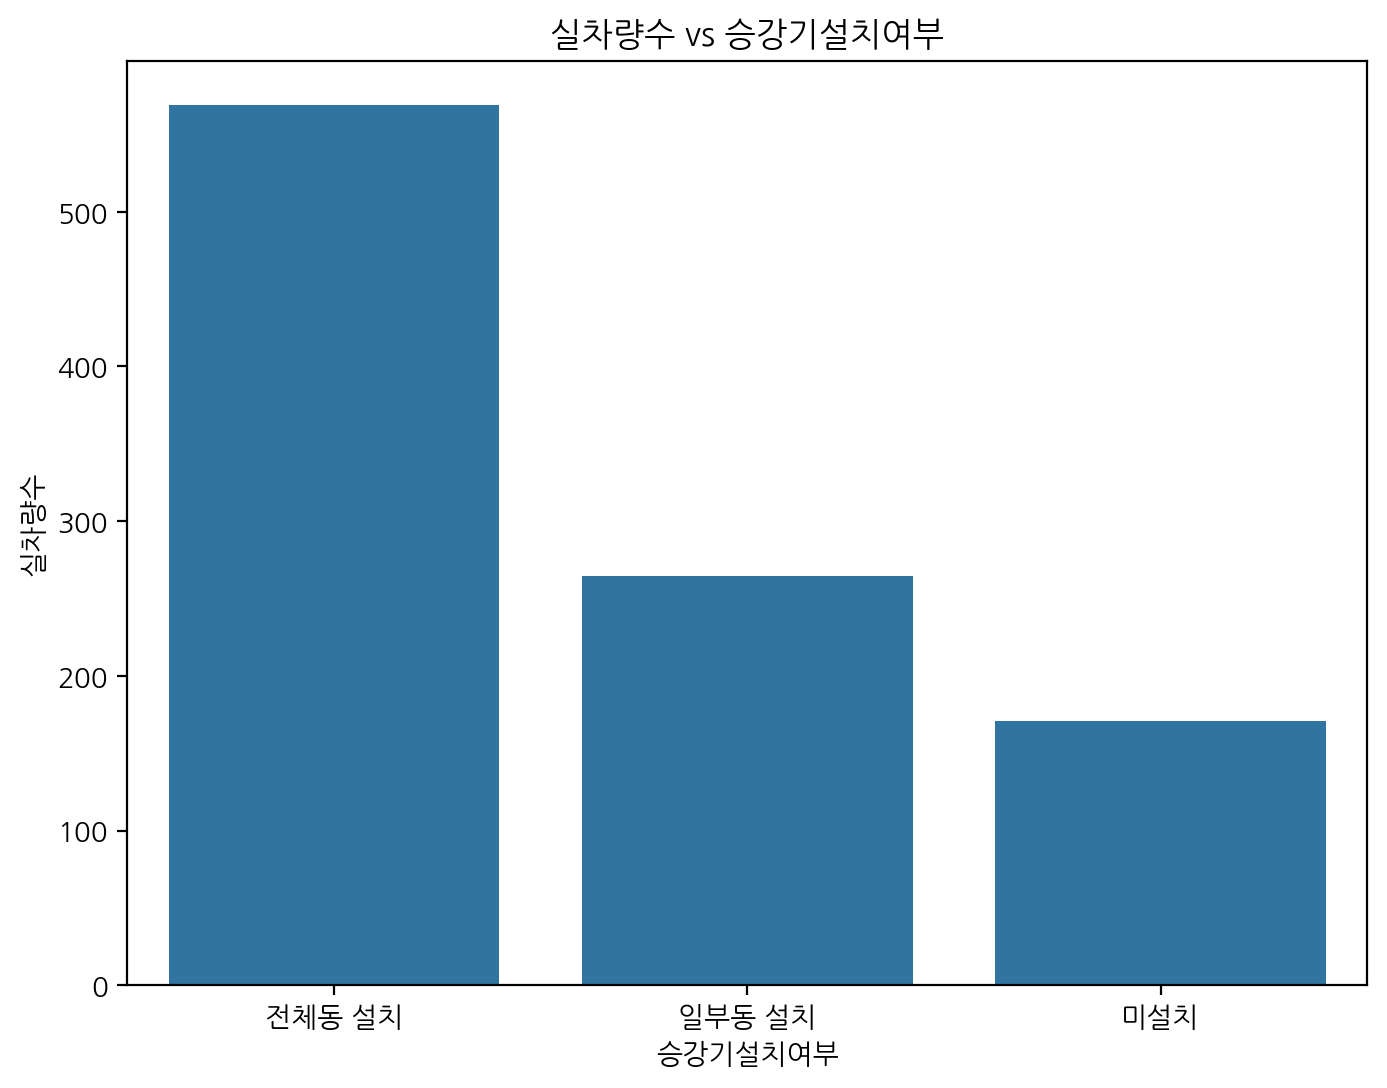

In [614]:
bar_plot('승강기설치여부')
# 의견 : 전체동 설치를 한 아파트가 많은데 일부동 설치에 실차량수 비율이 만만치 않은 것을 보니 일부동 설치를 한 지역에 실차량수를 많이 사용한다고도 볼 수 있다.

## 5. 추가 전처리

- '난방방식', '승강기설치여부' 두 변수에 대해서 적은 수의 범주로 묶는 작업을 진행합니다.
- '단지코드'는 개별적인 값이므로 예측과 관련이 없으니 제거합니다.
- '지역' 변수는 지역별 특성을 고려하기에는 너무 세분화 되어 있고, 특징으로 통합하기 어려우므로 제거합니다.

### (1) 난방방식

- '난방방식' 변수의 값을 다음과 같이 변경하여 세 개의 범줏값만 갖게 합니다.
    - 개별가스난방 → 개별
    - 개별유류난방 → 개별
    - 지역난방 → 지역
    - 지역가스난방 → 지역
    - 지역유류난방 → 지역
    - 중앙가스난방 → 중앙
    - 중앙난방 → 중앙
    - 중앙유류난방 → 중앙

In [617]:
apart['난방방식'] = apart['난방방식'].map(
    {'개별가스난방': '개별', 
    '개별유류난방': '개별', 
    '지역난방': '지역', 
    '지역가스난방': '지역', 
    '지역유류난방': '지역', 
    '중앙가스난방': '중앙', 
    '중앙난방': '중앙', 
    '중앙유류난방': '중앙'})
apart.head()

,단지코드,총세대수,지역,준공연도,건물형태,난방방식,승강기설치여부,실차량수,총면적,면적10_30,면적30_40,면적40_50,면적50_60,면적60_70,면적70_80,면적80_200,임대보증금,임대료
0,C0001,78,서울,2013,계단식,개별,전체동 설치,109,6023.7683,0,0,0,78,0,0,0,5.696200e+07,642930.000000
1,C0002,35,서울,2013,복도식,개별,전체동 설치,35,1569.1668,35,0,0,0,0,0,0,6.306200e+07,470100.000000
2,C0003,88,서울,2013,계단식,개별,전체동 설치,88,7180.1396,0,0,0,88,0,0,0,7.219000e+07,586540.000000
3,C0004,477,서울,2014,복도식,지역,전체동 설치,943,47058.9273,0,0,0,150,0,216,111,1.015167e+08,950305.000000
4,C0006,15,서울,2013,복도식,개별,전체동 설치,21,543.0268,15,0,0,0,0,0,0,5.522750e+07,340148.333333


### (2) 승강기설치여부

- '승강기설치여부' 변수의 값을 다음과 같이 변경하여 0, 1 값을 갖게 합니다.
    - 전체동 설치 → 1
    - 일부동 설치 → 0
    - 미설치 → 0

In [619]:
apart['승강기설치여부'] = apart['승강기설치여부'].map(
    {'전체동 설치': 1, 
    '일부동 설치': 0, 
    '미설치': 0})
apart.head()

,단지코드,총세대수,지역,준공연도,건물형태,난방방식,승강기설치여부,실차량수,총면적,면적10_30,면적30_40,면적40_50,면적50_60,면적60_70,면적70_80,면적80_200,임대보증금,임대료
0,C0001,78,서울,2013,계단식,개별,1,109,6023.7683,0,0,0,78,0,0,0,5.696200e+07,642930.000000
1,C0002,35,서울,2013,복도식,개별,1,35,1569.1668,35,0,0,0,0,0,0,6.306200e+07,470100.000000
2,C0003,88,서울,2013,계단식,개별,1,88,7180.1396,0,0,0,88,0,0,0,7.219000e+07,586540.000000
3,C0004,477,서울,2014,복도식,지역,1,943,47058.9273,0,0,0,150,0,216,111,1.015167e+08,950305.000000
4,C0006,15,서울,2013,복도식,개별,1,21,543.0268,15,0,0,0,0,0,0,5.522750e+07,340148.333333


### (3) 단지코드, 지역 제거

- '단지코드', '지역' 변수를 제거합니다.

In [621]:
del_cols = ['단지코드','지역']
apart.drop(columns=del_cols, inplace=True)

- 최종 데이터를 확인합니다.

In [519]:
apart.head()

,총세대수,준공연도,건물형태,난방방식,승강기설치여부,실차량수,총면적,면적10_30,면적30_40,면적40_50,면적50_60,면적60_70,면적70_80,면적80_200,임대보증금,임대료
0,78,2013,계단식,개별,1,109,6023.7683,0,0,0,78,0,0,0,5.696200e+07,642930.000000
1,35,2013,복도식,개별,1,35,1569.1668,35,0,0,0,0,0,0,6.306200e+07,470100.000000
2,88,2013,계단식,개별,1,88,7180.1396,0,0,0,88,0,0,0,7.219000e+07,586540.000000
3,477,2014,복도식,지역,1,943,47058.9273,0,0,0,150,0,216,111,1.015167e+08,950305.000000
4,15,2013,복도식,개별,1,21,543.0268,15,0,0,0,0,0,0,5.522750e+07,340148.333333


In [886]:
apart.drop(columns=['면적10_30', '면적30_40', '면적40_50', '면적50_60', '면적60_70', '면적70_80', '면적80_200'],inplace=True)

In [884]:
apart

,단지코드,총세대수,지역,준공연도,건물형태,난방방식,승강기설치여부,실차량수,총면적,임대보증금,임대료
0,C0001,78,서울,2013,계단식,개별가스난방,전체동 설치,109,6023.7683,5.696200e+07,642930.000000
1,C0002,35,서울,2013,복도식,개별가스난방,전체동 설치,35,1569.1668,6.306200e+07,470100.000000
2,C0003,88,서울,2013,계단식,개별가스난방,전체동 설치,88,7180.1396,7.219000e+07,586540.000000
3,C0004,477,서울,2014,복도식,지역난방,전체동 설치,943,47058.9273,1.015167e+08,950305.000000
4,C0006,15,서울,2013,복도식,개별가스난방,전체동 설치,21,543.0268,5.522750e+07,340148.333333
...,...,...,...,...,...,...,...,...,...,...,...
340,C0354,1485,대전충남,1993,복도식,중앙난방,전체동 설치,298,64622.2500,7.595571e+06,104975.714286
341,C1354,1386,대전충남,1993,복도식,중앙가스난방,전체동 설치,258,57616.8100,8.092875e+06,111848.750000
342,C0356,956,경기,1994,복도식,지역가스난방,전체동 설치,243,37398.7200,9.931000e+06,134540.000000
343,C0358,120,강원,2020,복도식,개별가스난방,전체동 설치,47,5581.8024,2.515500e+06,50040.000000


## 6. 데이터 셋 저장

- joblib.dump() 함수를 사용하여 최종 데이터 셋을 파일로 저장합니다.
- 파일 이름은 base_data2.pkl로 합니다.

In [667]:
# 파일로 저장
joblib.dump(apart, path+'base_data2.pkl')

['base_data2.pkl']